# S1 vs s2  vs f200 Conditional GAN - 13/12/19

THis is our attempt and creating a 3D GAN, accurately recreating S1, S2 and f200. This had mixed levels of success, and for this reason will not feature massively in the report. THis is something that will continue to be worked on during the next semester of the MPhys Project.

In [0]:
pip install uproot

     |████████████████████████████████| 122kB 2.7MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My\ Drive/dark_matter_7_12_19

/content/gdrive/My Drive/dark_matter_7_12_19


Here we will extract some root files, most will be used to train the GAN, then one will be used to 'validate' the GAN.

Currently, we will use 50, 150, and 250 to train and 100 and 200 to validate.

In [0]:
import uproot
import pandas
import numpy as np
import matplotlib.pyplot as plt

tree50 = uproot.open("dark_matter_runs_50kev.root")["dstree"]
tree100 = uproot.open("dark_matter_100kev_v1.root")["dstree"]
tree150 = uproot.open("dark_matter_runs_150kev.root")["dstree"]
tree200 = uproot.open("dark_matter_runs_200kev.root")["dstree"]

In [0]:
tree50.show()

ev                         (no streamer)              asdtype('>i4')
pdg                        (no streamer)              asdtype('>i4')
ene0                       (no streamer)              asdtype('>f4')
s1ene                      (no streamer)              asdtype('>f4')
s2ene                      (no streamer)              asdtype('>f4')
veto_visene                (no streamer)              asdtype('>f4')
mu_visene                  (no streamer)              asdtype('>f4')
vetoene                    (no streamer)              asdtype('>f4')
muene                      (no streamer)              asdtype('>f4')
tpcene                     (no streamer)              asdtype('>f4')
x                          (no streamer)              asdtype('>f4')
y                          (no streamer)              asdtype('>f4')
z                          (no streamer)              asdtype('>f4')
ene                        (no streamer)              asdtype('>f4')
r                          (no str

The Variable is input here to try to make the code reusable and as general as possible.

In [0]:
#VARIABLE
var1 = "s1_corr"
var2 = "s2"
var3 = "f200like_tile"

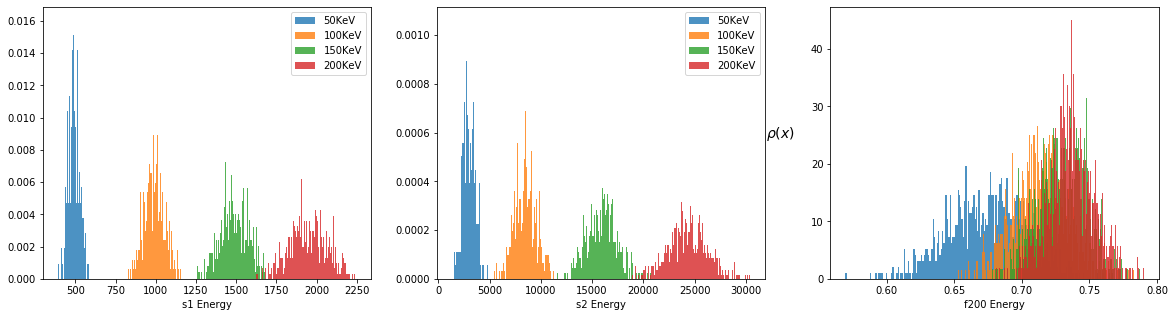

In [0]:
div1 = 1
#div1 = 2000
div2 = 1
div2 = 20
div3 = 0.001
rangemins1 = 0
rangemaxs1 = 2000
rangemins2 = 2000
rangemaxs2 = 22000
rangeminf200 = 0.5
rangemaxf200 = 0.8
train_DS_s1ene_50 = np.array(tree50.array(f"{var1}"))/div1
train_DS_s1ene_100 = np.array(tree100.array(f"{var1}"))/div1
train_DS_s1ene_150 = np.array(tree150.array(f"{var1}"))/div1
train_DS_s1ene_200 = np.array(tree200.array(f"{var1}"))/div1

train_DS_s2ene_50 = np.array(tree50.array(f"{var2}"))/div2
train_DS_s2ene_100 = np.array(tree100.array(f"{var2}"))/div2
train_DS_s2ene_150 = np.array(tree150.array(f"{var2}"))/div2
train_DS_s2ene_200 = np.array(tree200.array(f"{var2}"))/div2

train_DS_f200ene_50 = np.array(tree50.array(f"{var3}"))/div3
train_DS_f200ene_100 = np.array(tree100.array(f"{var3}"))/div3
train_DS_f200ene_150 = np.array(tree150.array(f"{var3}"))/div3
train_DS_f200ene_200 = np.array(tree200.array(f"{var3}"))/div3

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)
ax1.hist(train_DS_s1ene_50*div1, density = True, bins = 205, alpha = 0.8, label = "50KeV")
ax1.hist(train_DS_s1ene_100*div1, density = True, bins = 205, alpha = 0.8, label = "100KeV")
ax1.hist(train_DS_s1ene_150*div1, density = True, bins = 205, alpha = 0.8, label = "150KeV")
ax1.hist(train_DS_s1ene_200*div1, density = True, bins = 205, alpha = 0.8, label = "200KeV")

ax1.set_xlabel("s1 Energy")
#ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
ax1.legend(loc="upper right", fontsize=10)

ax2.hist(train_DS_s2ene_50*div2,density = True, bins = 205, alpha = 0.8, label = "50KeV")
ax2.hist(train_DS_s2ene_100*div2, density = True, bins = 205, alpha = 0.8, label = "100KeV")
ax2.hist(train_DS_s2ene_150*div2, density = True, bins = 205, alpha = 0.8, label = "150KeV")
ax2.hist(train_DS_s2ene_200*div2, density = True, bins = 205, alpha = 0.8, label = "200KeV")

ax2.set_xlabel("s2 Energy")
#ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
ax2.legend(loc="upper right", fontsize=10)

ax3.hist(train_DS_f200ene_50*div3,density = True, bins = 205, alpha = 0.8, label = "50KeV")
ax3.hist(train_DS_f200ene_100*div3, density = True, bins = 205, alpha = 0.8, label = "100KeV")
ax3.hist(train_DS_f200ene_150*div3, density = True, bins = 205, alpha = 0.8, label = "150KeV")
ax3.hist(train_DS_f200ene_200*div3, density = True, bins = 205, alpha = 0.8, label = "150KeV")

ax3.set_xlabel("f200 Energy")
ax3.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
#ax3.legend(loc="upper right", fontsize=10)

plt.show()

In [0]:
num_train = int(1e3)
noise_size = 1000

# Length needs to be followed through
train_var = [50.,100., 150.]

In [0]:
from keras.layers     import BatchNormalization, Dense, Dropout, Input, LeakyReLU, Concatenate
from keras.models     import Model, Sequential, load_model
from keras.optimizers import Adam, SGD

import keras.backend as K
d_do = 0.2
g_nodes = 200
d_nodes = 200
g_do = 0.2
#Input of GEN VALUE
d1_in = Input((3,))
d1 = Dense(d_nodes, activation="relu")(d1_in)
d1 = Dropout(d_do)(d1)

#Input of parameter = energy
hyper_in = Input((1,))
d2 = Dense(d_nodes, activation="relu")(hyper_in)
d2 = Dropout(d_do)(d2)

dc = Concatenate()([d1, d2])
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = LeakyReLU(0.2)(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = Dropout(d_do)(dc)
dc = Dense(g_nodes , activation="relu")(dc)
dc = LeakyReLU(0.2)(dc)
dc = Dropout(d_do)(dc)
dc = Dense(2, activation="softmax")(dc)

dc = Model(name="Discriminator", inputs=[d1_in, hyper_in], outputs=[dc])
dc.compile(loss="categorical_crossentropy", optimizer=Adam(0.0005, beta_1=0.3), metrics=["accuracy"])
# 0.0005, beta_1=0.5
dc.summary()

#INPUT OF NOISE TO GENERATOR
g1_in = Input((noise_size,))
g1 = Dense(g_nodes, activation="relu")(g1_in)
g1 = Dropout(g_do)(g1)
g1 = BatchNormalization()(g1)
g1 = Dense(g_nodes, activation="relu")(g1)

#INPUT OF HYPERPARAM
g2 = Dense(g_nodes, activation="relu")(hyper_in)

gc = Concatenate()([g1, g2])
gc = BatchNormalization()(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
gc = Dense(g_nodes, activation="relu")(gc)
gc = Dropout(g_do)(gc)
g1 = Dense(g_nodes, activation="relu")(g1)
gc = Dropout(g_do)(gc)
g1 = Dense(g_nodes, activation="relu")(g1)
gc = Dropout(g_do)(gc)
g1 = Dense(g_nodes, activation="relu")(g1)
gc = Dense(3, activation="linear")(gc)

gc = Model(name="Generator", inputs=[g1_in, hyper_in], outputs=[gc])
gc.summary()


gan_out = dc([gc([g1_in, hyper_in]), hyper_in])
gan = Model([g1_in, hyper_in], gan_out, name="GAN")
dc.trainable = False
gan.compile(loss="categorical_crossentropy", optimizer=Adam(0.0005, beta_1=0.3), metrics=["accuracy"])
gan.summary()

Using TensorFlow backend.






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "Discriminator"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 3)            0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 1)            0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 200)          800         input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 200)          400        

In [0]:
#  Train GAN
rel_batch_size = 1
max_D_itrs_per_G_itr_e80 = 2
max_D_itrs_per_G_itr_e52 = 3

In [0]:
def plot_points_GAN (gen_data, train_DS_s1ene_50, train_DS_s1ene_100,train_DS_s1ene_150, epoch, batch_size, d_acc) :

    s1 = np.asarray(gen_DS)[:,0]
    s2 = np.asarray(gen_DS)[:,1]
    f200 = np.asarray(gen_DS)[:,2]

    gen_class_length = int(gen_DS.shape[0]/3)
    gen_data_50_s1 = s1[:gen_class_length                    ]
    gen_data_100_s1 = s1[gen_class_length  :2*gen_class_length]
    gen_data_150_s1 = s1[2*gen_class_length:3*gen_class_length]


    gen_data_50_s2 = s2[:gen_class_length                    ]
    gen_data_100_s2 = s2[gen_class_length  :2*gen_class_length]
    gen_data_150_s2 = s2[2*gen_class_length:3*gen_class_length]

    gen_data_50_f200 = f200[:gen_class_length                    ]
    gen_data_100_f200 = f200[gen_class_length  :2*gen_class_length]
    gen_data_150_f200 = f200[2*gen_class_length:3*gen_class_length]

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_figheight(5)
    fig.set_figwidth(20)
    fig.suptitle(f"s1 and s2 from a 2D cGAN at Epoch {epoch} and batch size {batch_size}")
    #y_max, x, _ = plt.hist(train_DS_s1ene_50,range = (0,70), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    ax1.hist(train_DS_s1ene_50,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    ax1.hist(train_DS_s1ene_100,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "100KeV", color='red')
    ax1.hist(train_DS_s1ene_150,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "150KeV",color='green')

    ax1.hist(gen_data_50_s1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='blue')
    ax1.hist(gen_data_100_s1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='red')
    ax1.hist(gen_data_150_s1,range = (rangemins1,rangemaxs1), density = True, bins = 205, color='green')


    ax1.set_xlabel("s1 Energy")
    ax1.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
    ax1.legend(loc="upper right", fontsize=10)
    #ax1.text(60,0.75*0.8,f"Epochs: {e}")
    #ax1.text(60,0.65*0.8,f"Batch Size: {batch_size}")

    ax2.hist(train_DS_s2ene_50*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    ax2.hist(train_DS_s2ene_100*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "100KeV", color='red')
    ax2.hist(train_DS_s2ene_150*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "150KeV",color='green')


    ax2.hist(gen_data_50_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='blue')
    ax2.hist(gen_data_100_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='red')
    ax2.hist(gen_data_150_s2*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, color='green')

    ax3.hist(train_DS_f200ene_50*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, alpha = 0.4, label = "50KeV", color='blue')
    ax3.hist(train_DS_f200ene_100*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, alpha = 0.4, label = "100KeV", color='red')
    ax3.hist(train_DS_f200ene_150*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, alpha = 0.4, label = "150KeV",color='green')


    ax3.hist(gen_data_50_f200*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, color='blue')
    ax3.hist(gen_data_100_f200*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, color='red')
    ax3.hist(gen_data_150_f200*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, color='green')



    ax2.set_xlabel("s2 Energy")
    ax2.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")
    #ax2.title(f"s2 from a 2D cGAN at Epoch {e} and batch size {batch_size}")
    #ax2.text(8.5,0.75*5,f"Epochs: {e}")
    #ax2.text(8.5,0.65*5,f"Batch Size: {batch_size}")
    ax3.set_xlabel("f200")
    ax3.set_ylabel(r"$\rho\left(x\right)$", size=14, labelpad=30, rotation="horizontal")

    ax2.legend(loc="upper right", fontsize=10)

    plt.show()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


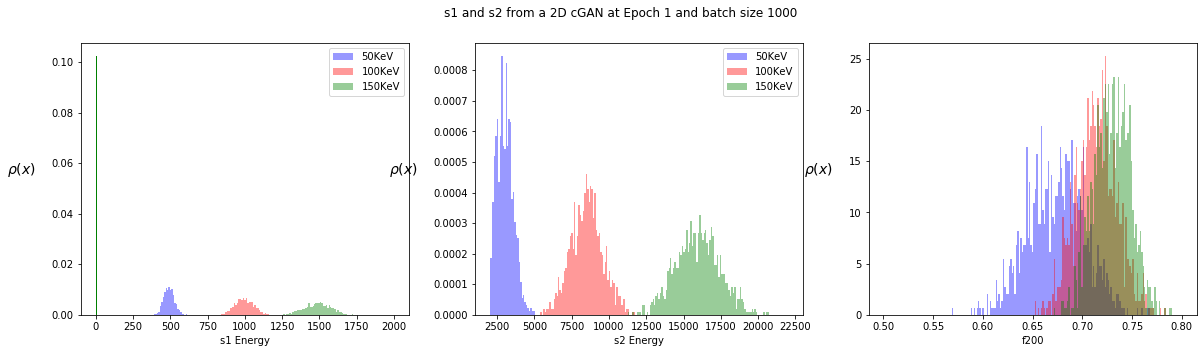

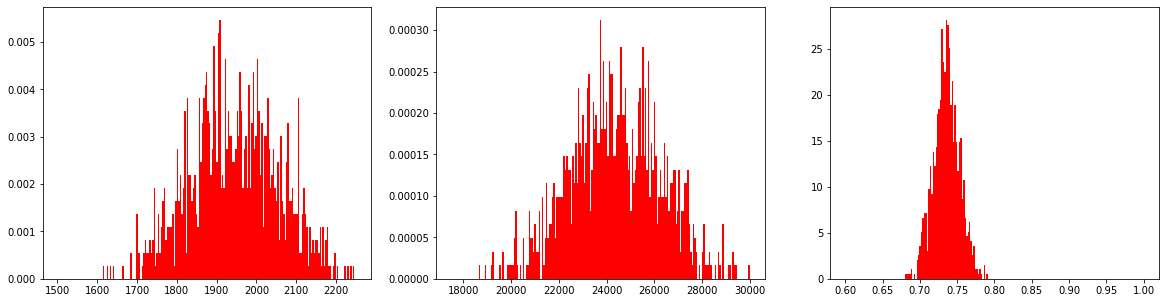

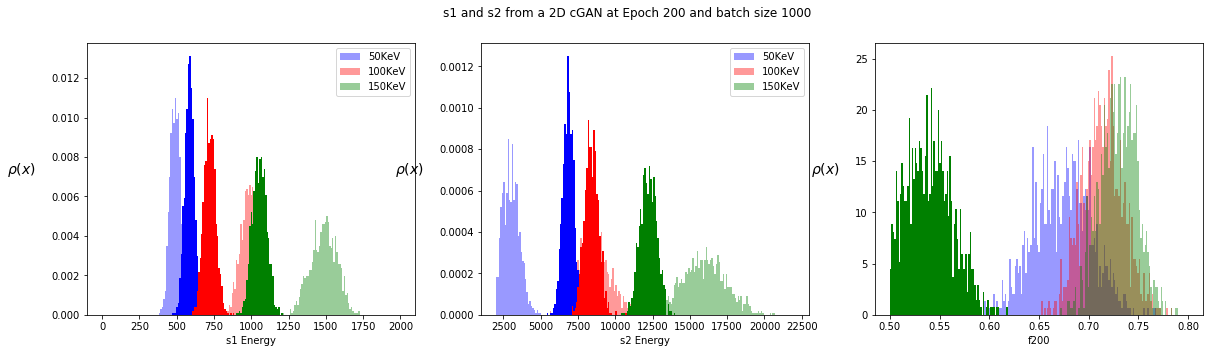

SAVE


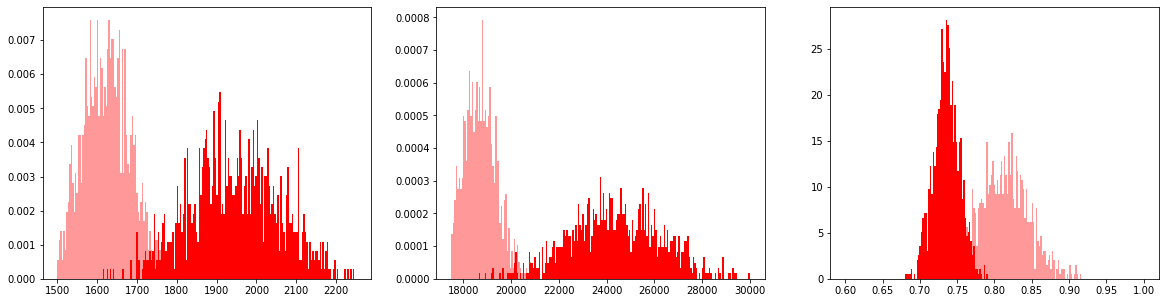

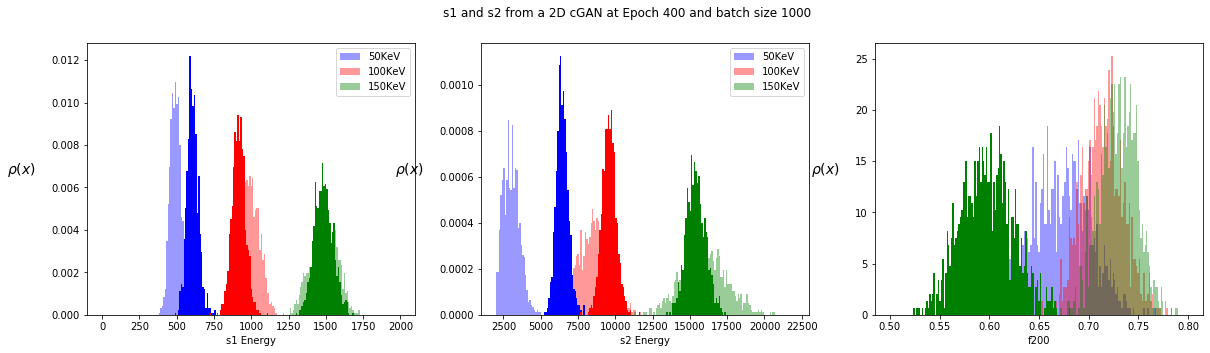

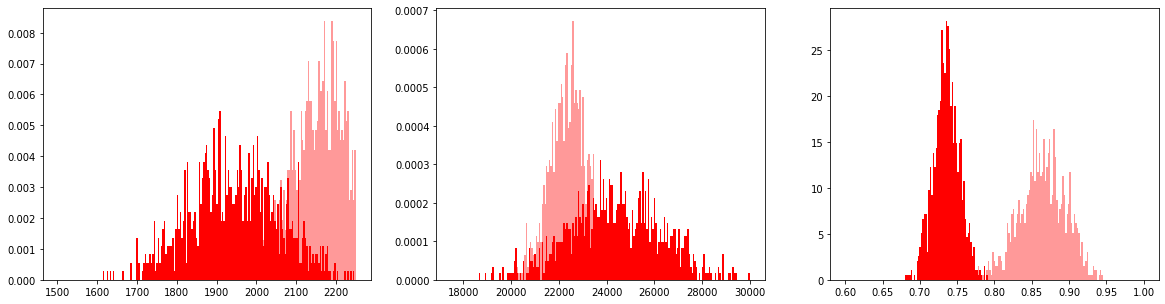

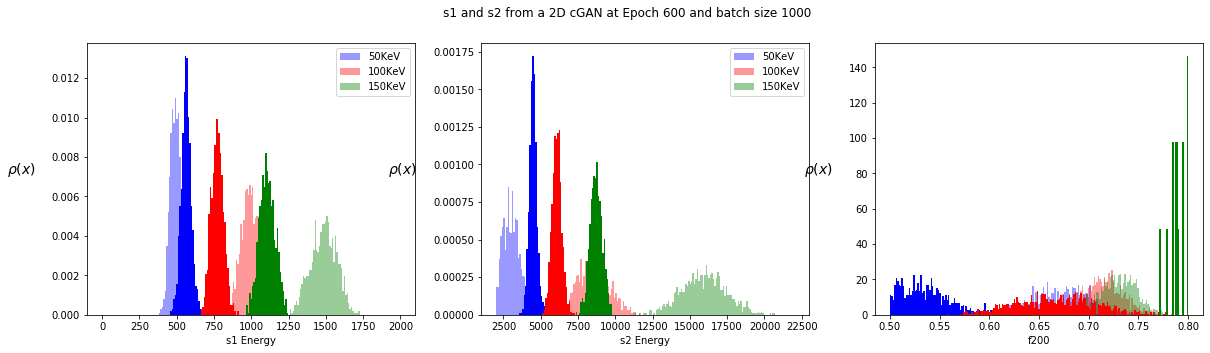

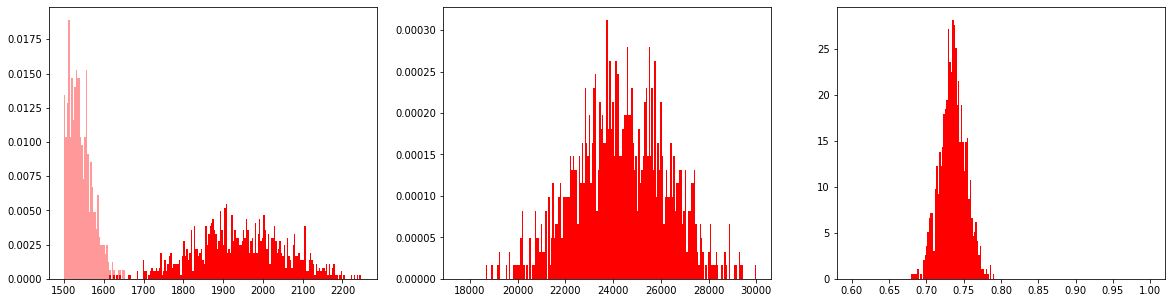

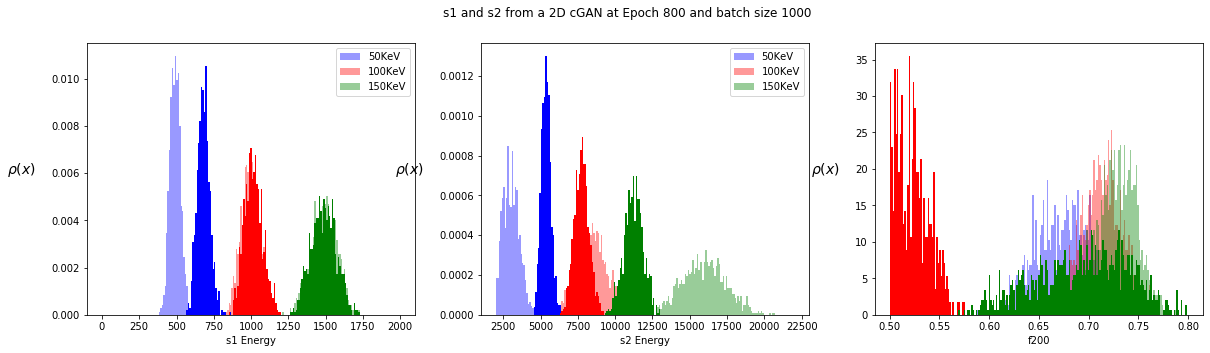

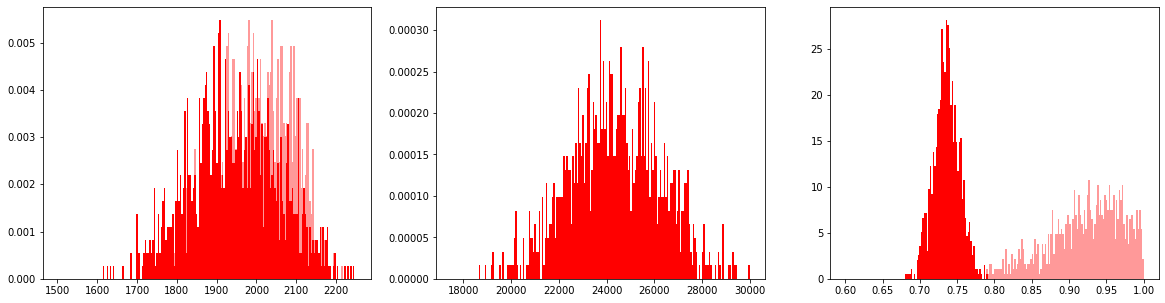

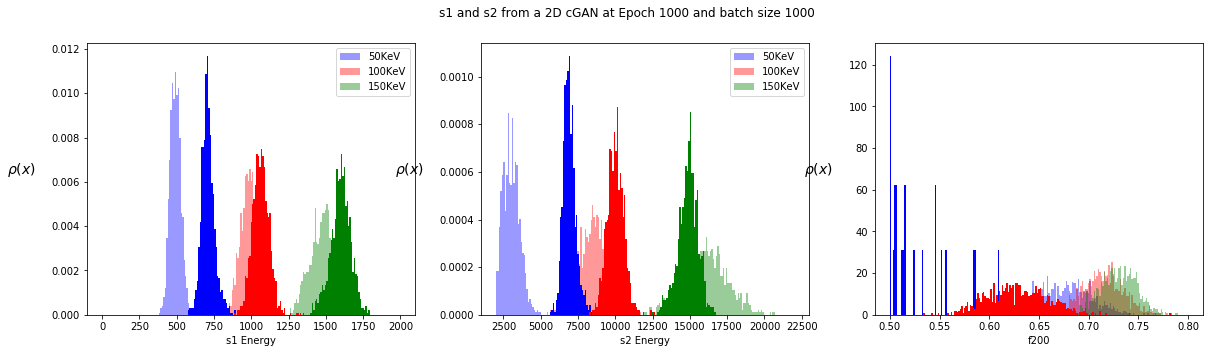

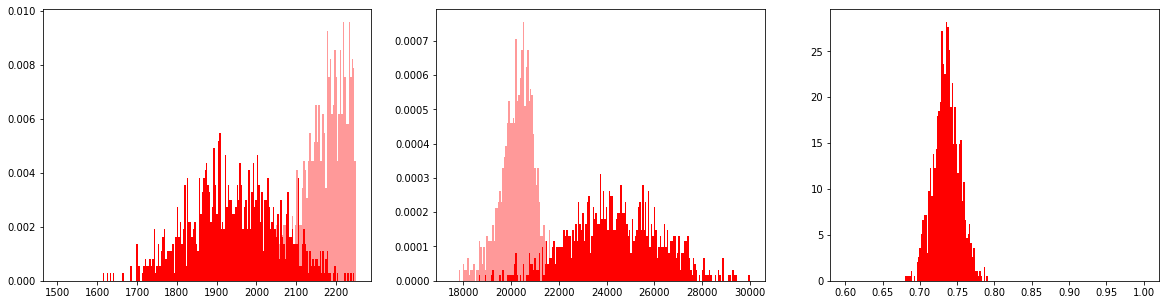

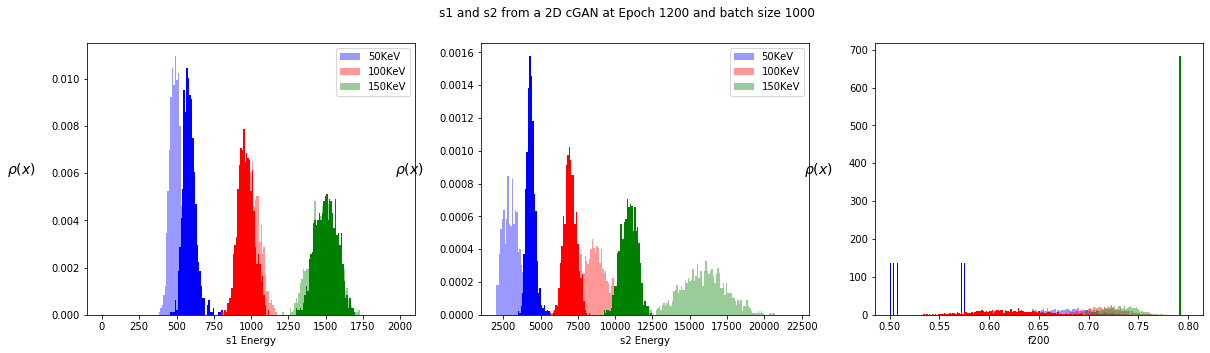

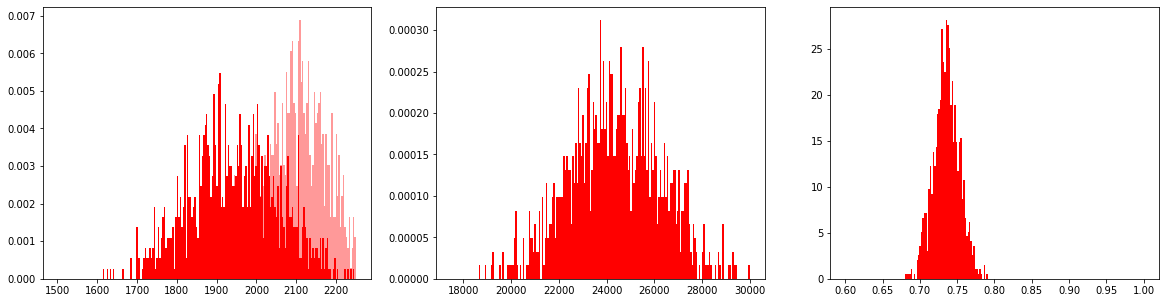

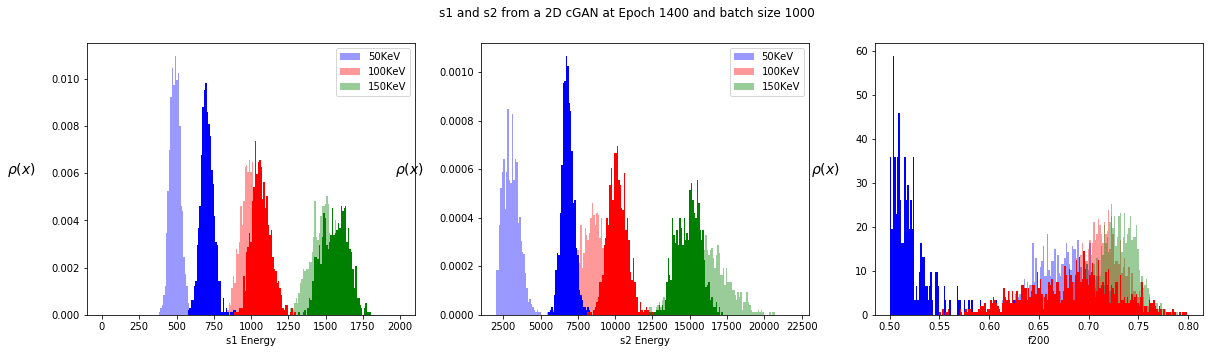

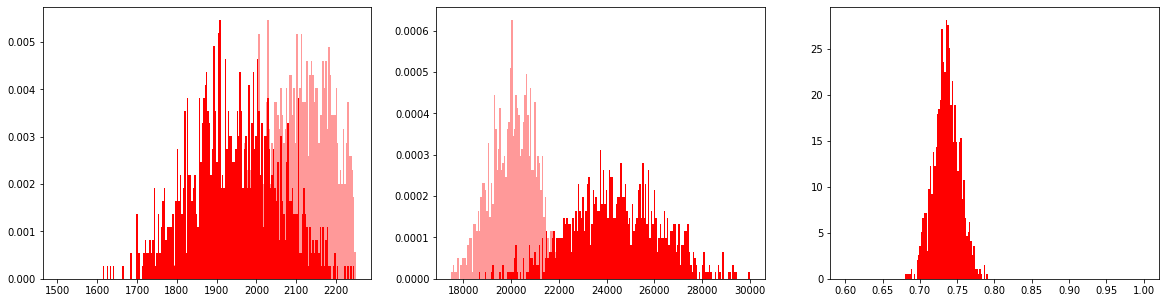

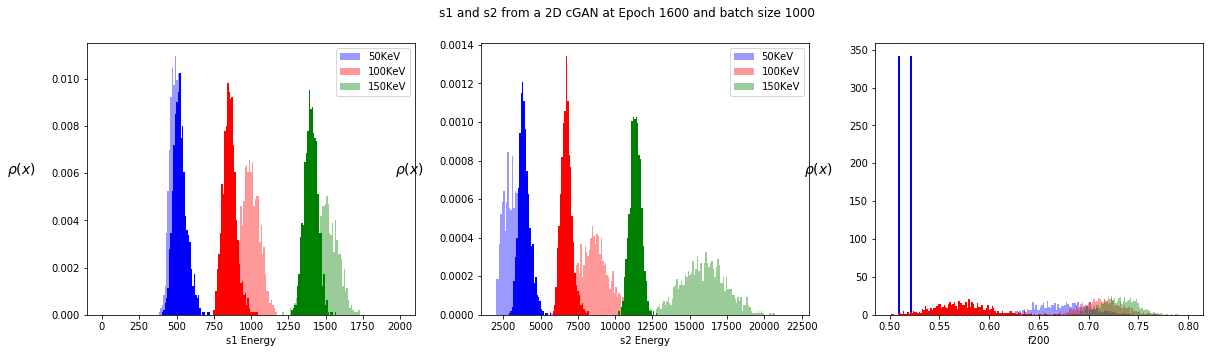

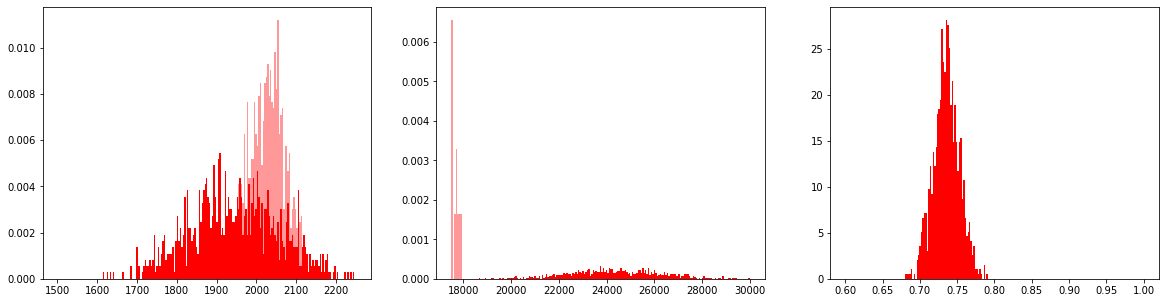

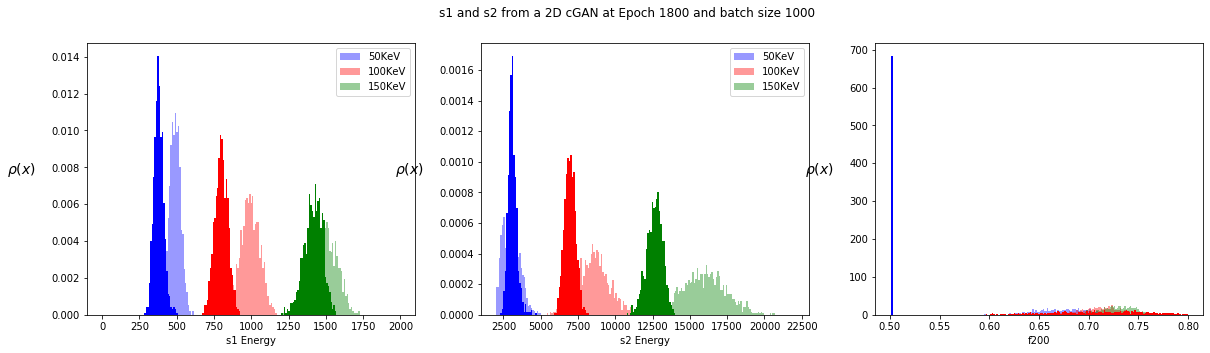

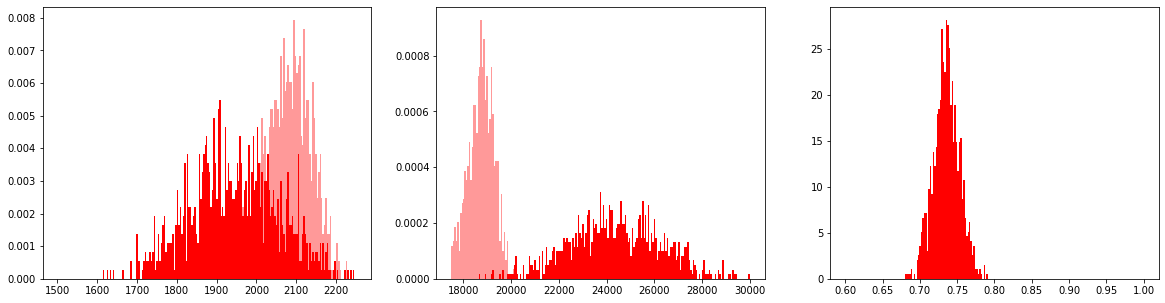

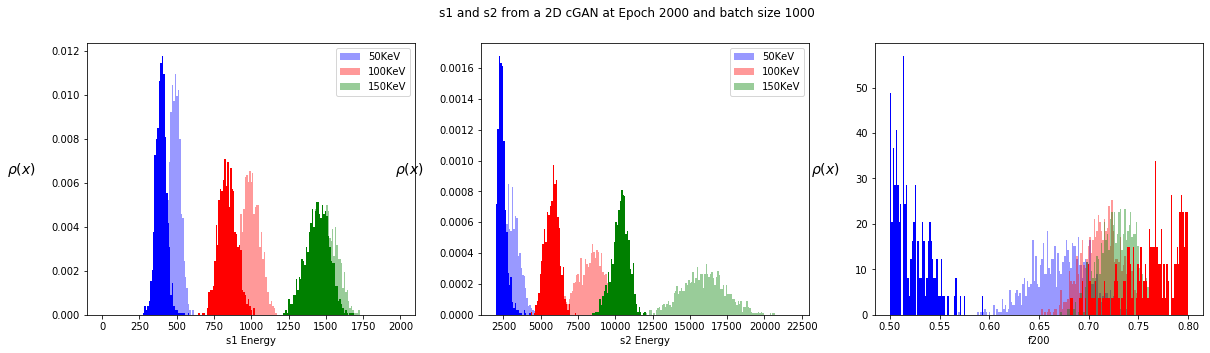

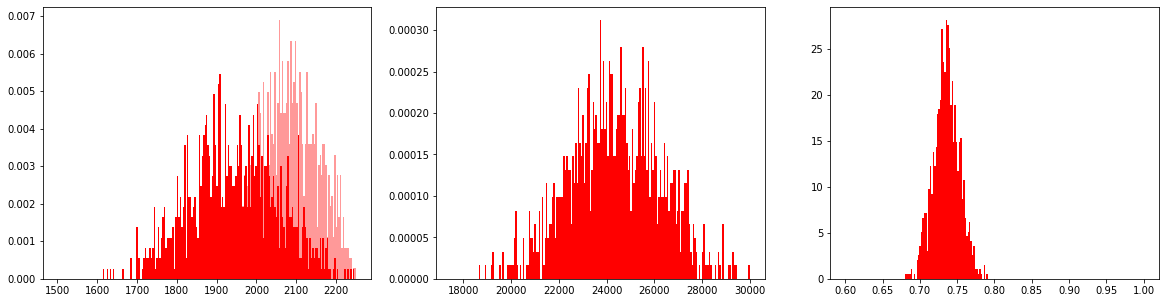

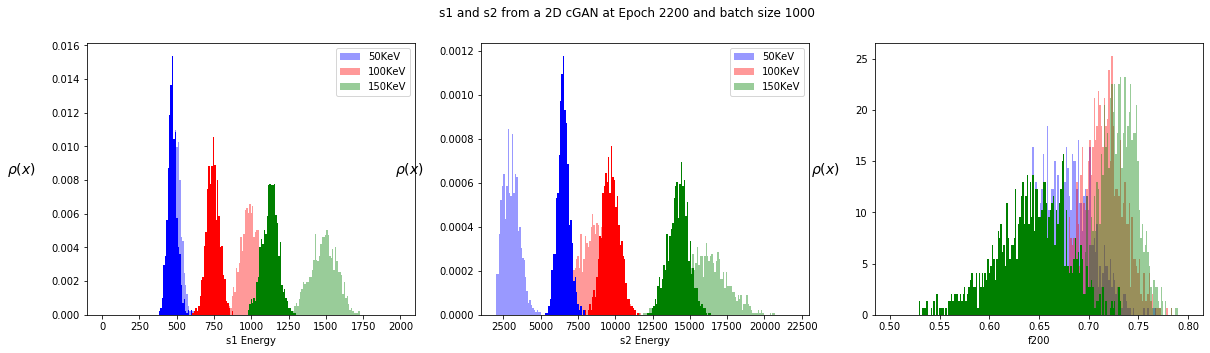

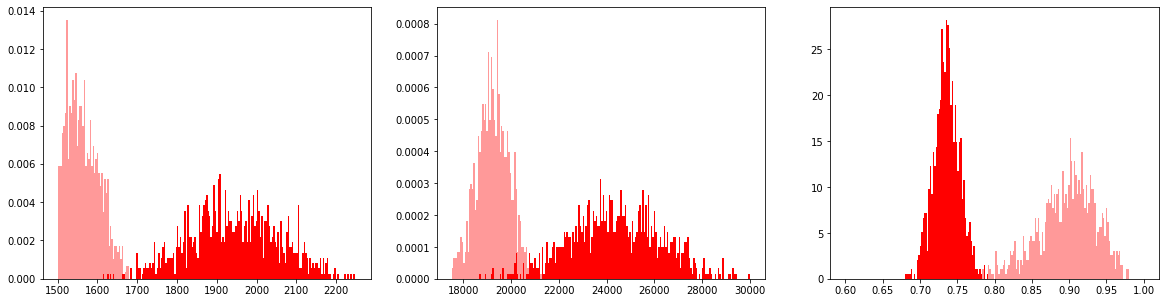

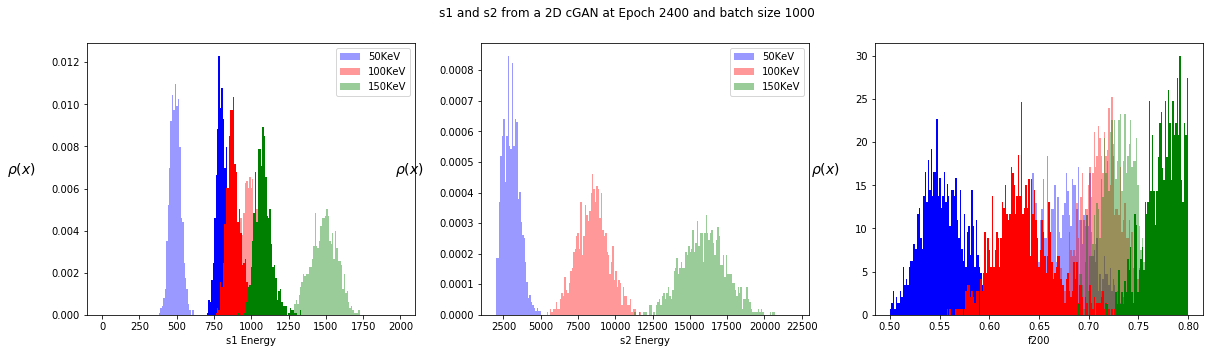

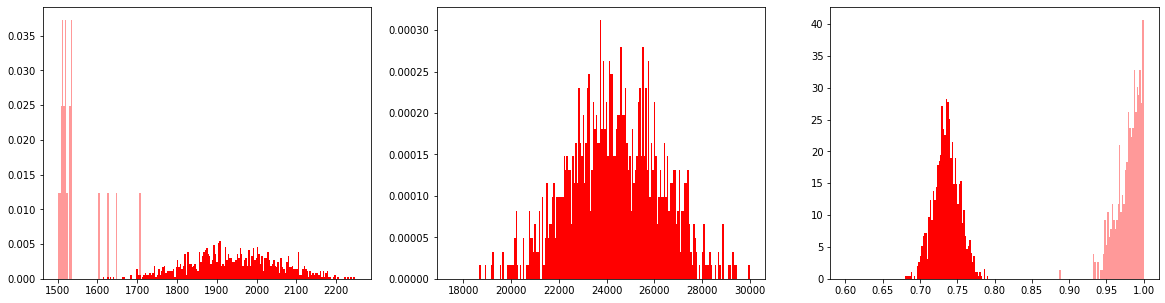

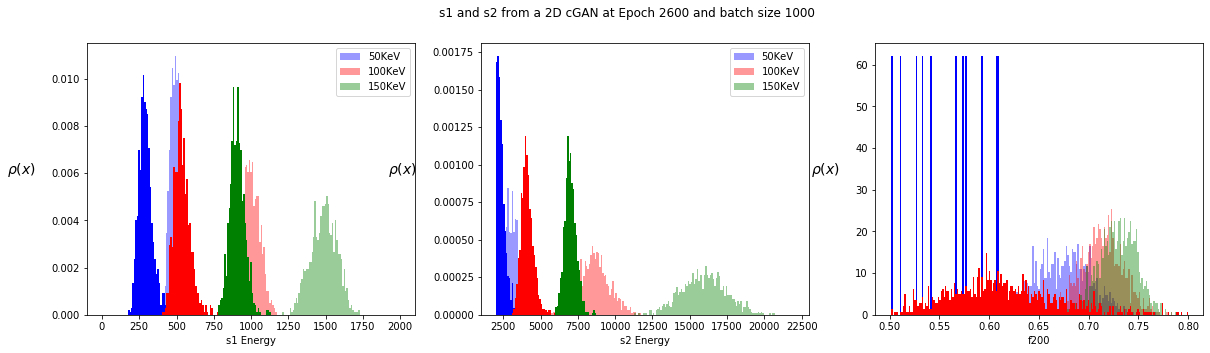

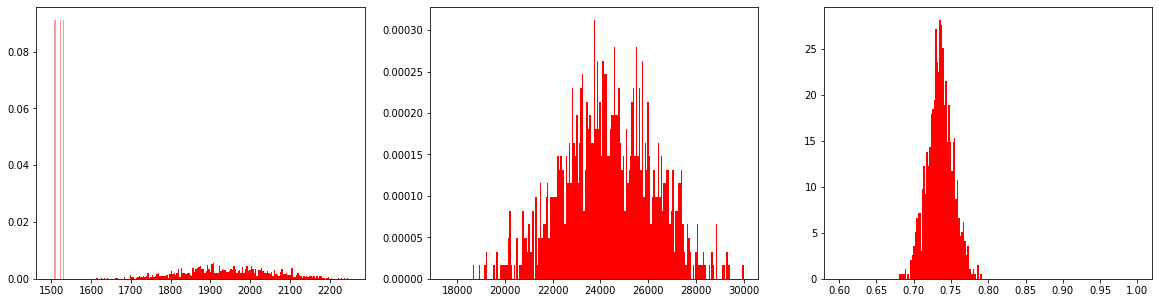

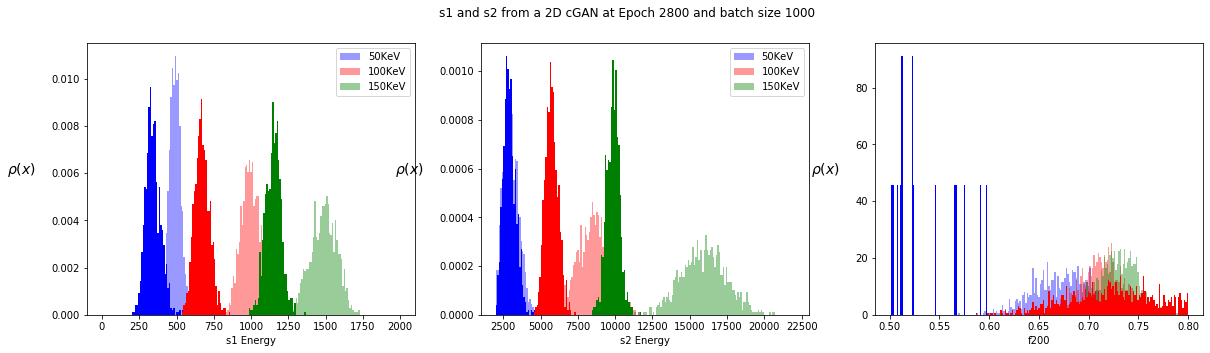

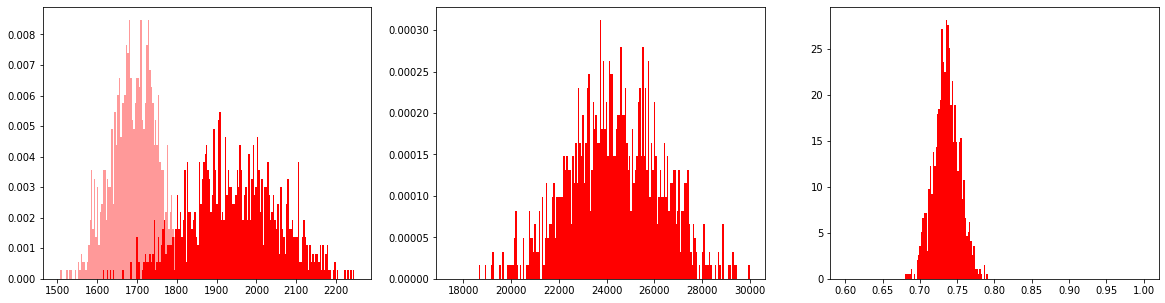

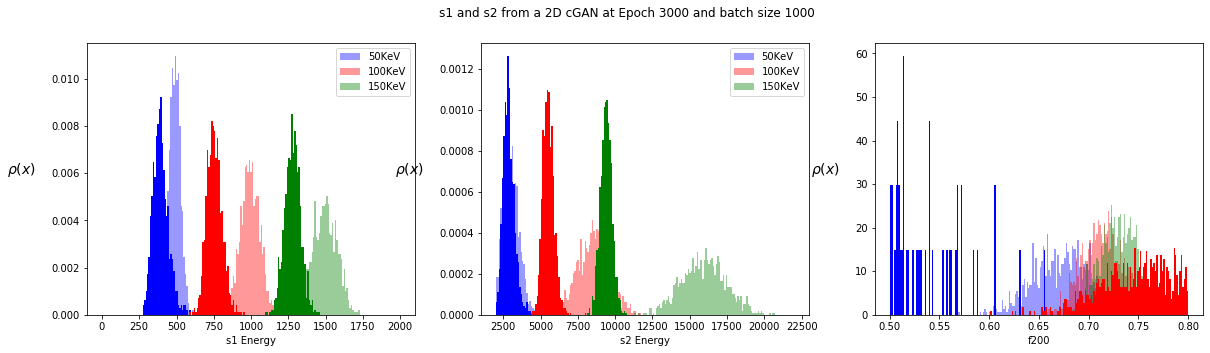

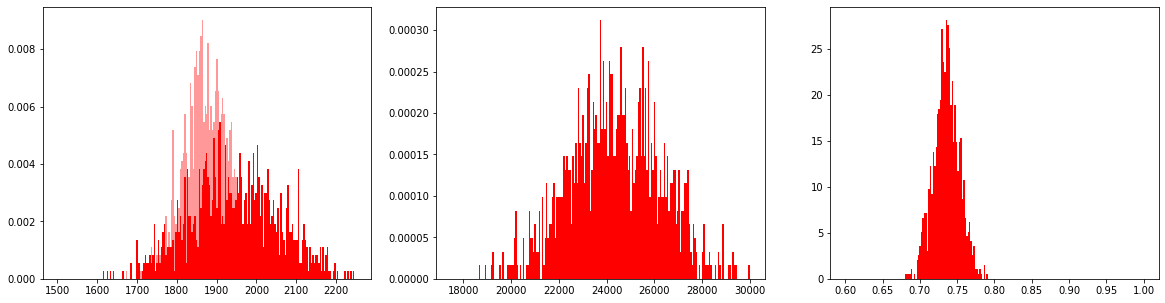

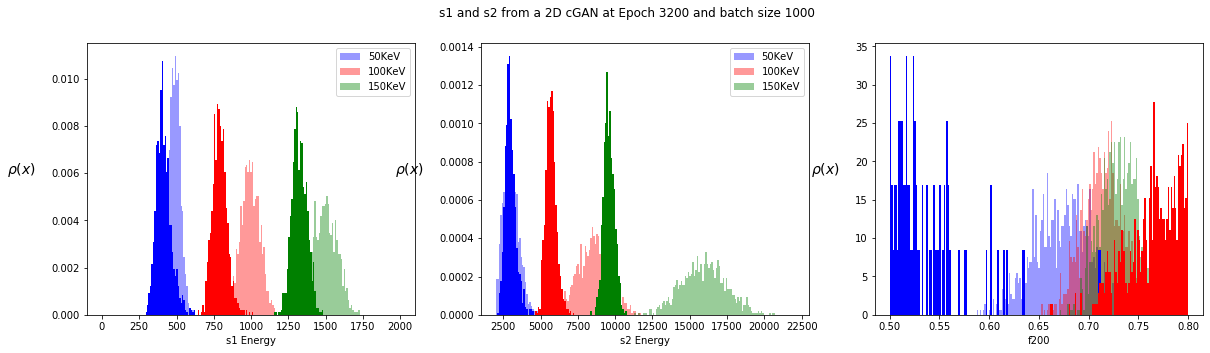

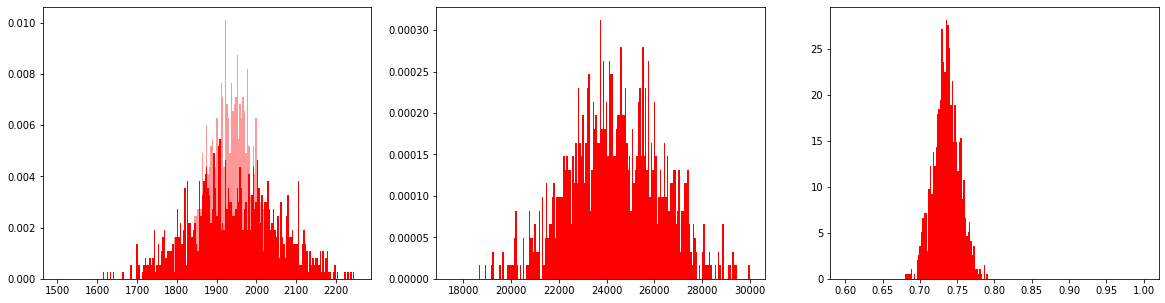

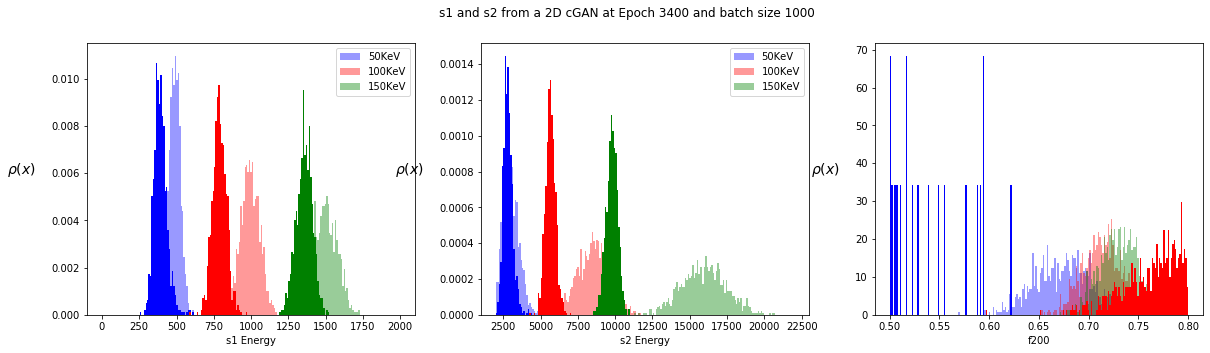

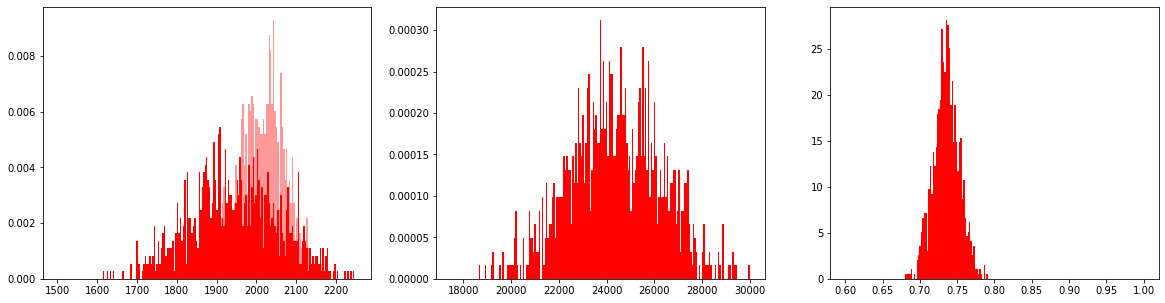

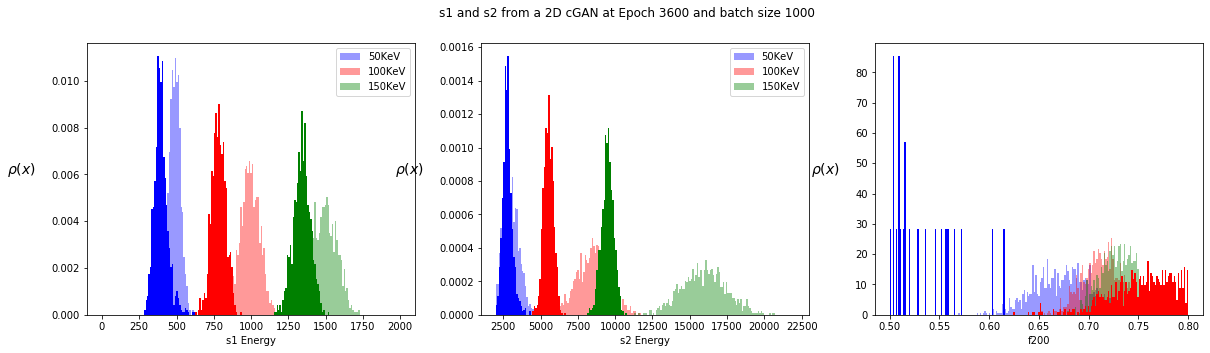

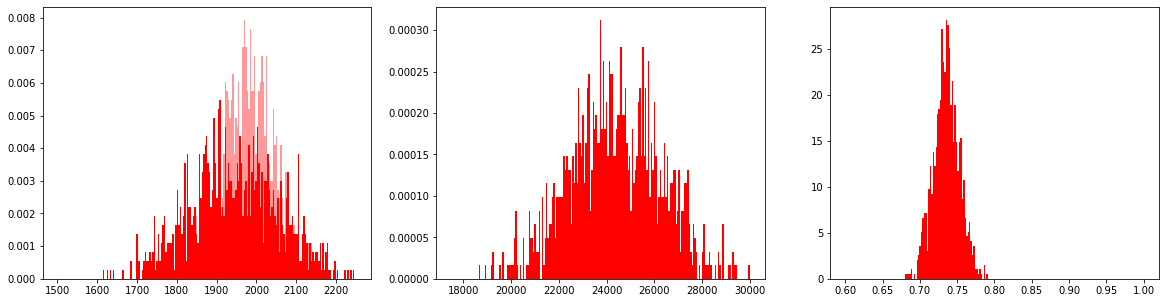

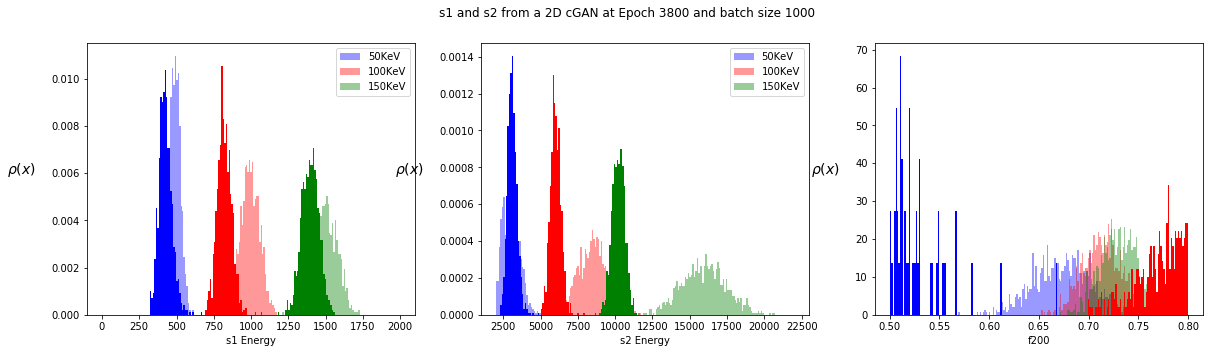

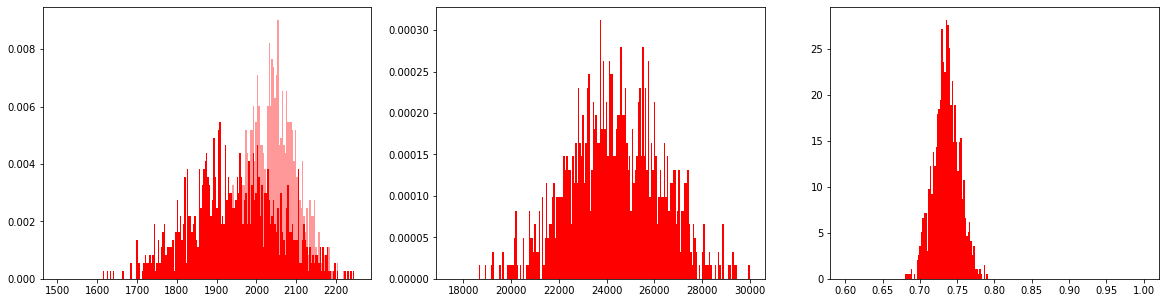

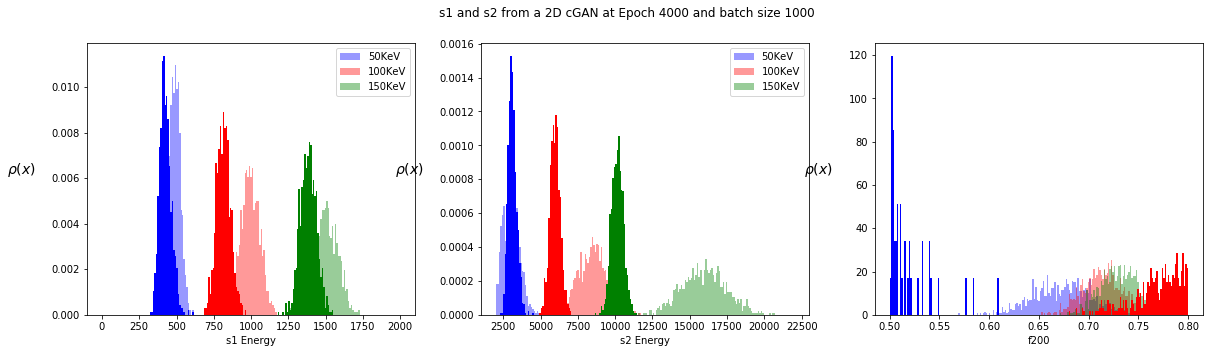

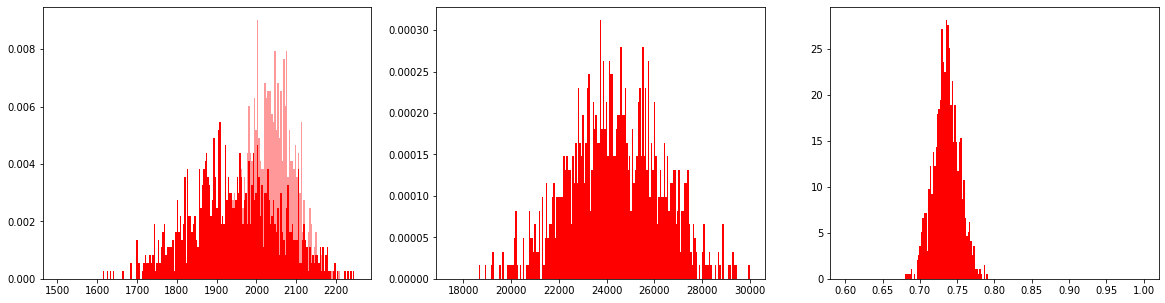

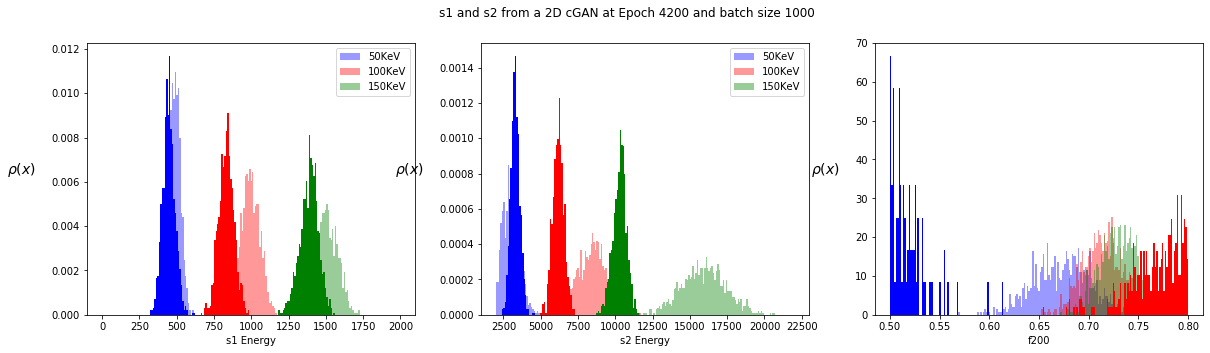

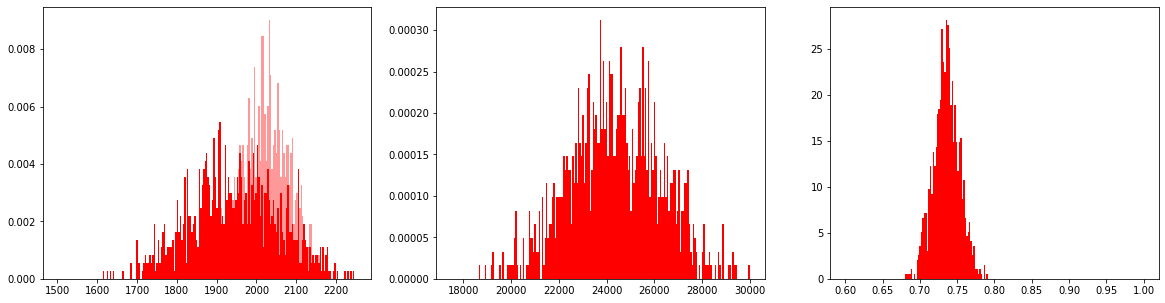

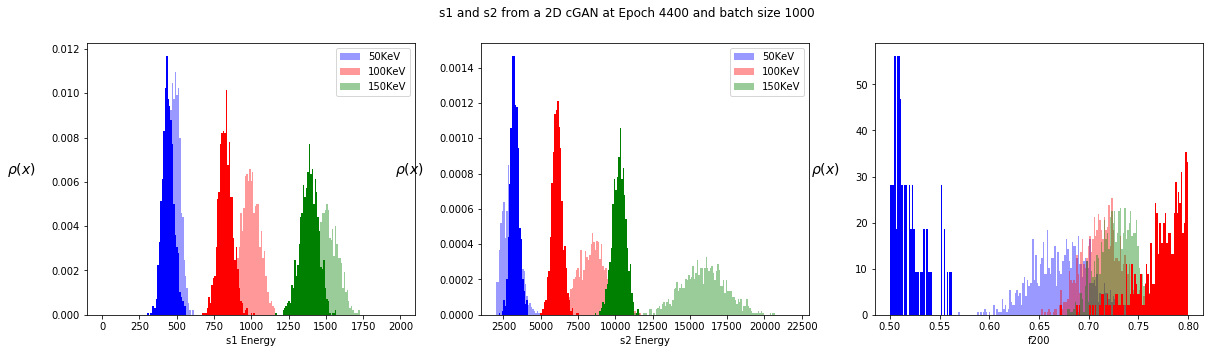

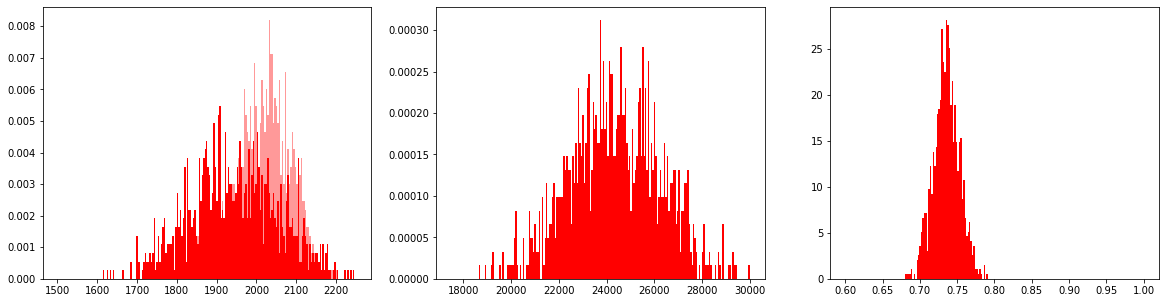

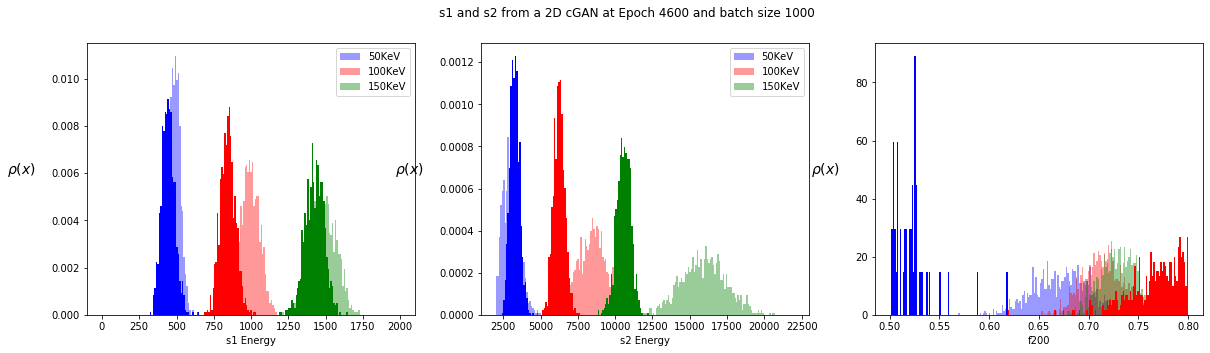

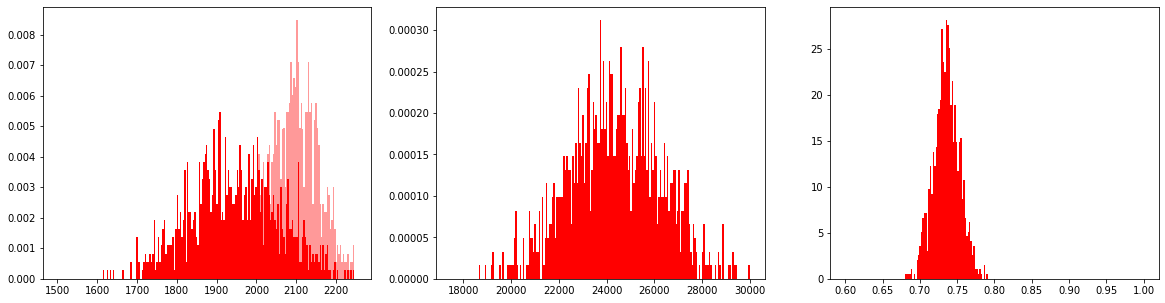

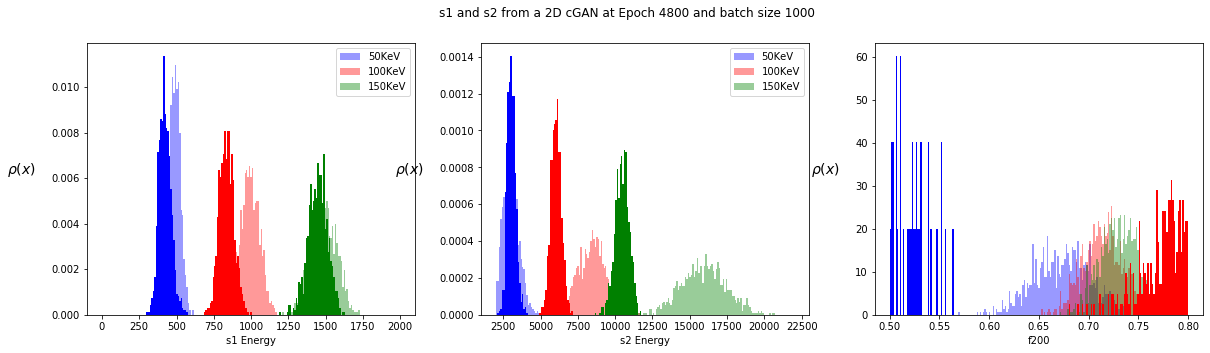

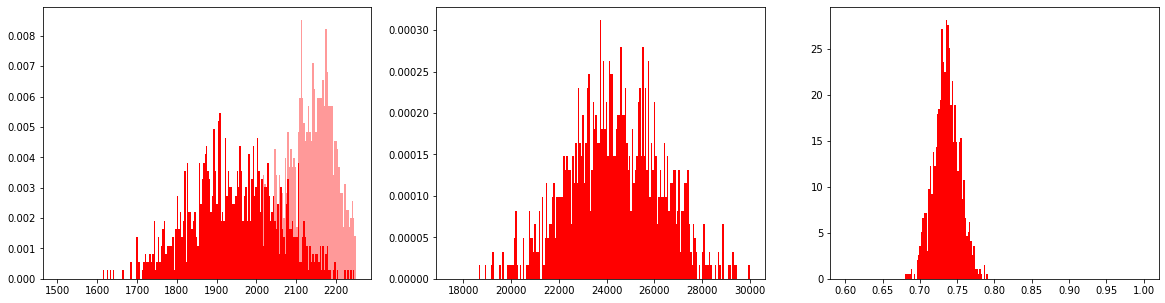

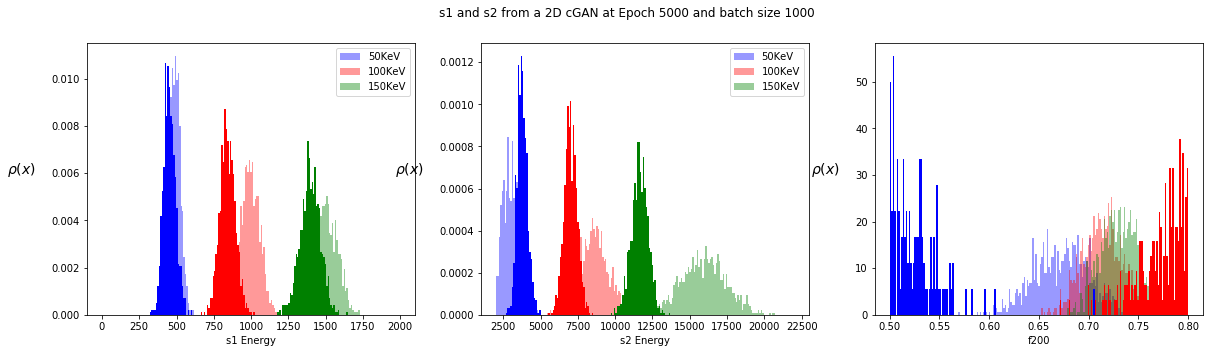

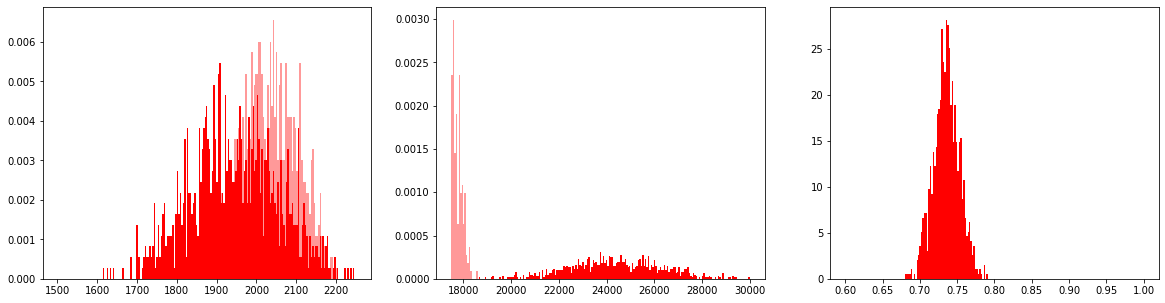

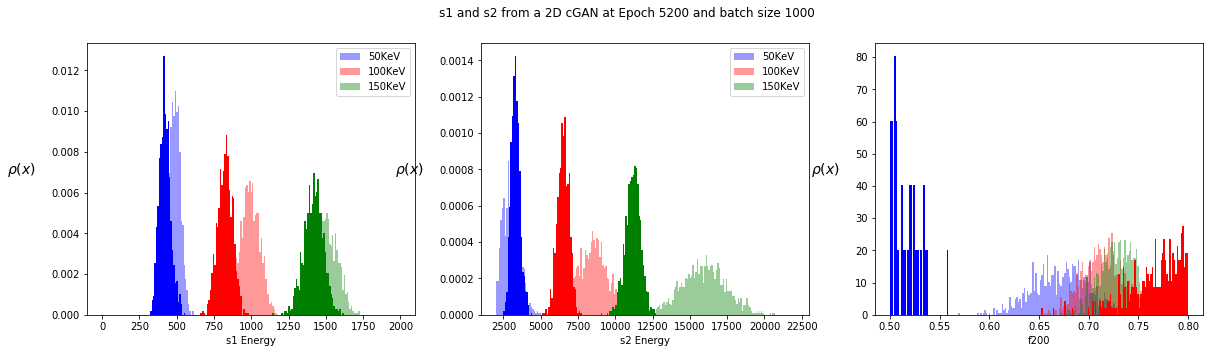

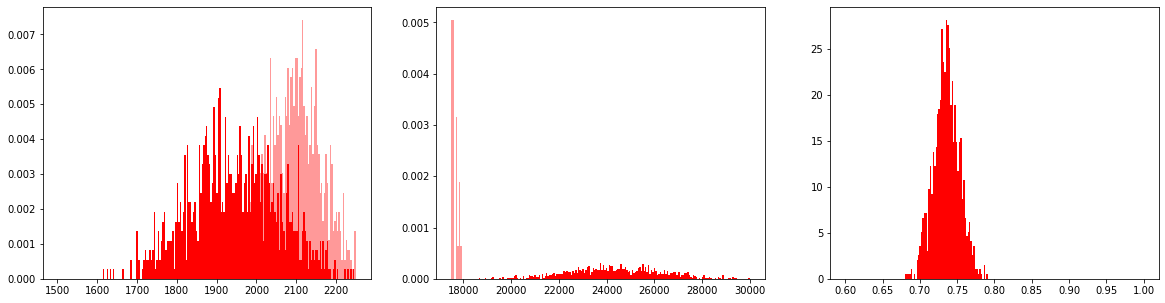

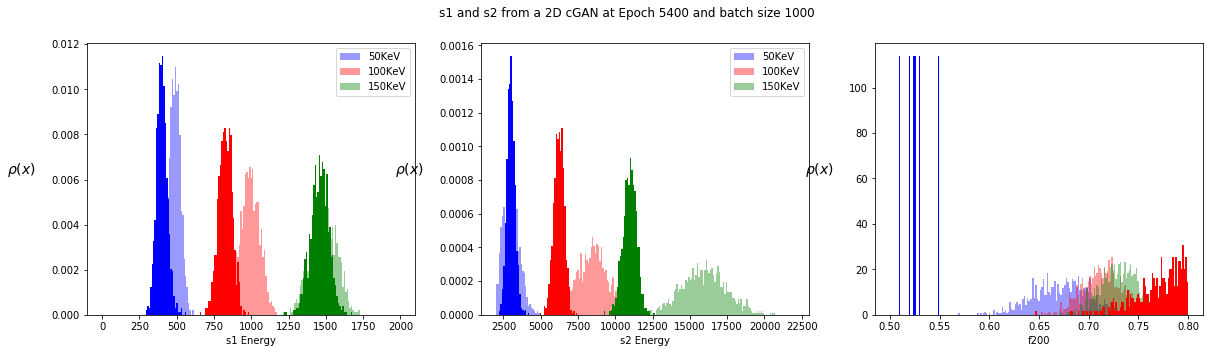

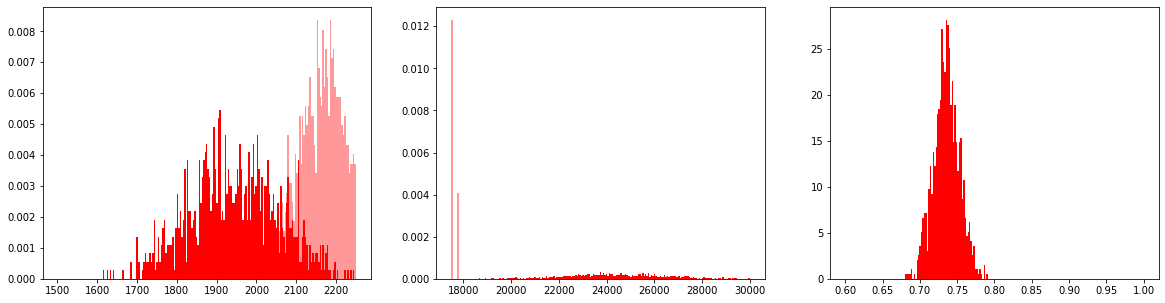

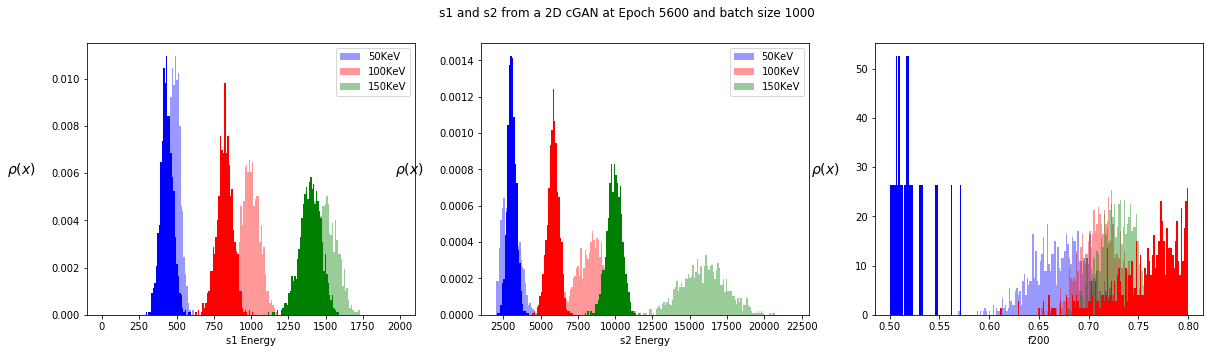

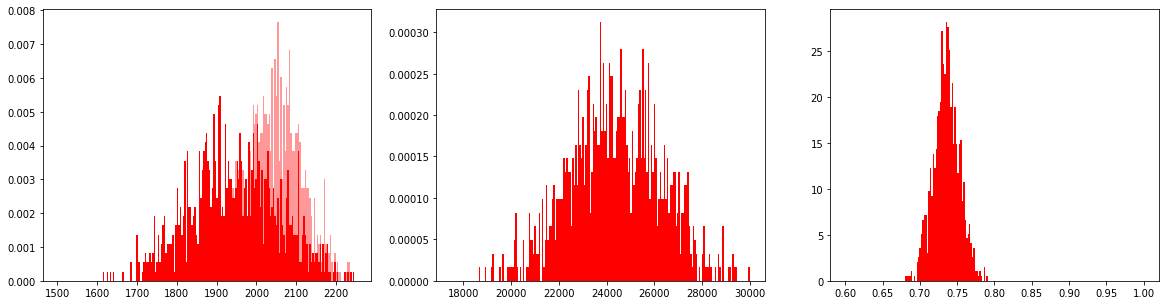

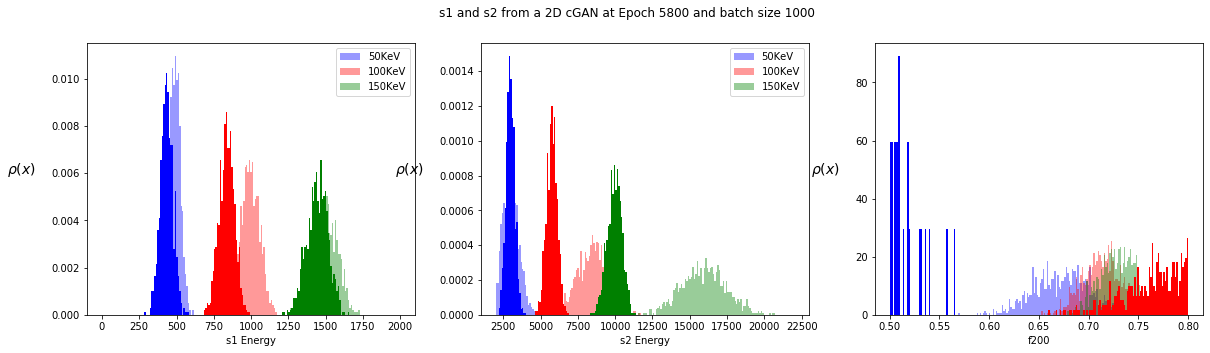

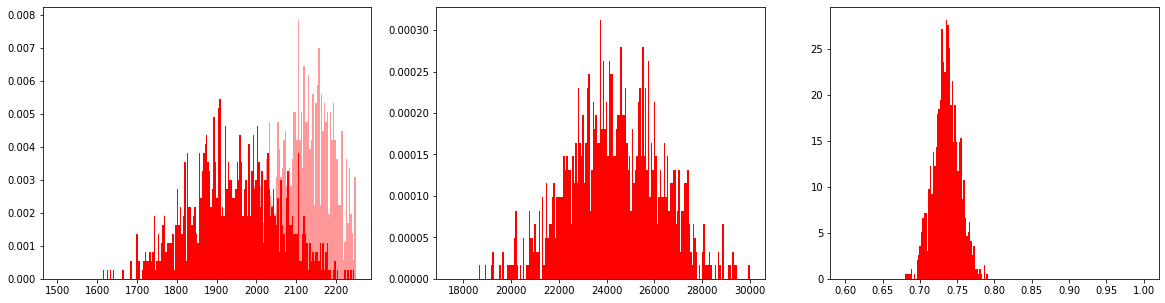

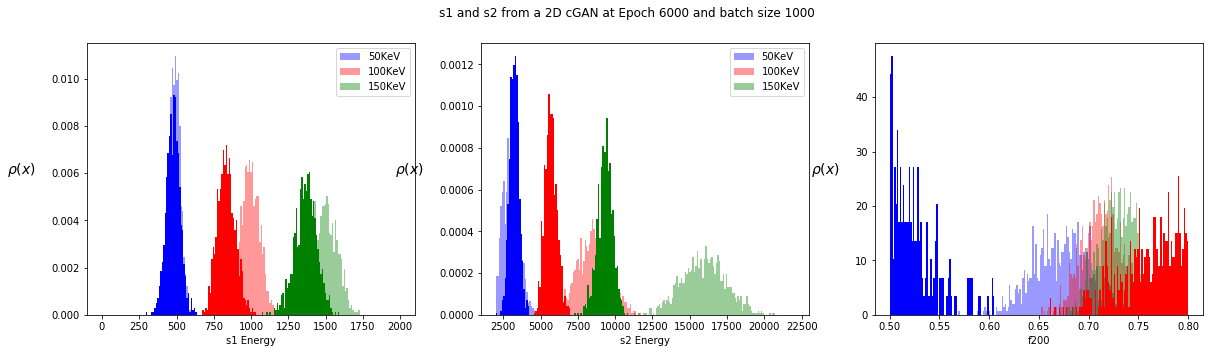

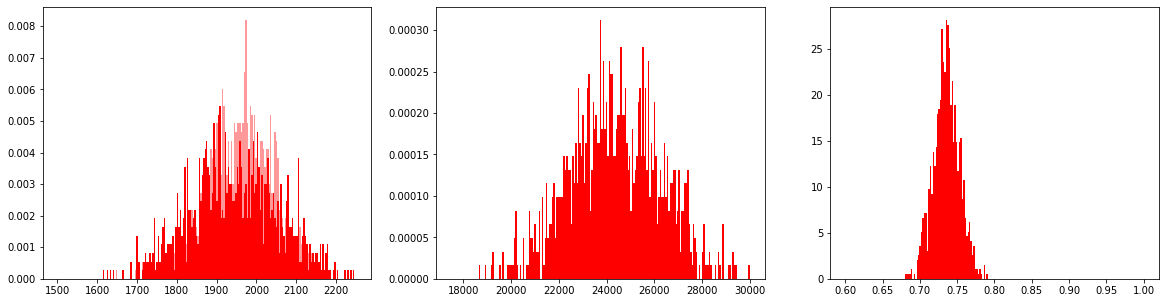

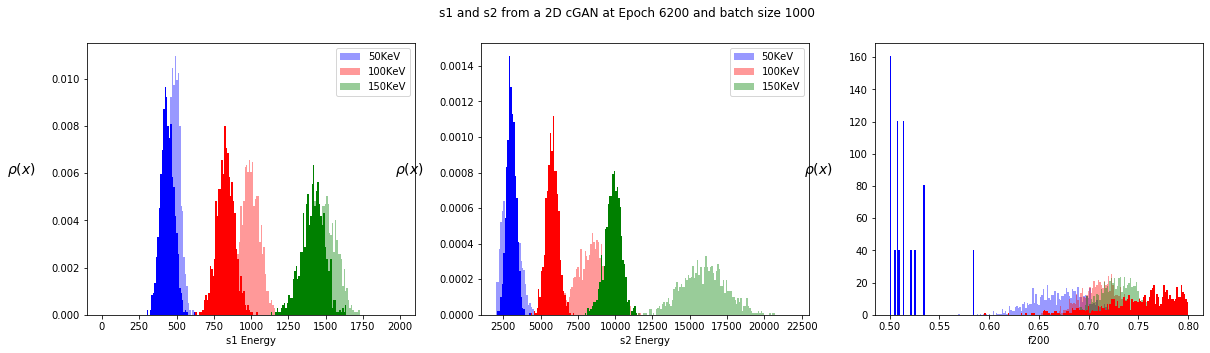

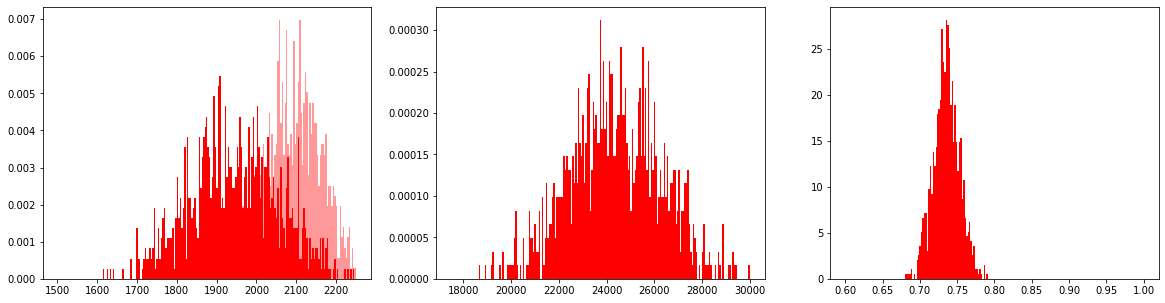

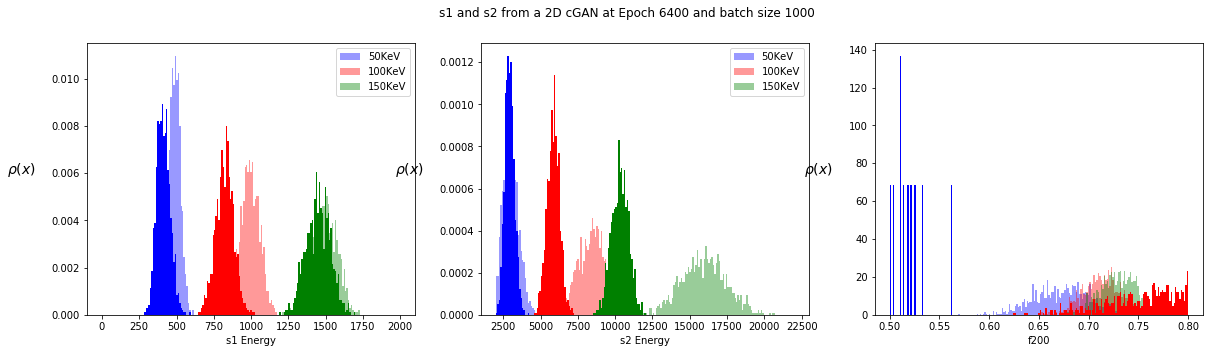

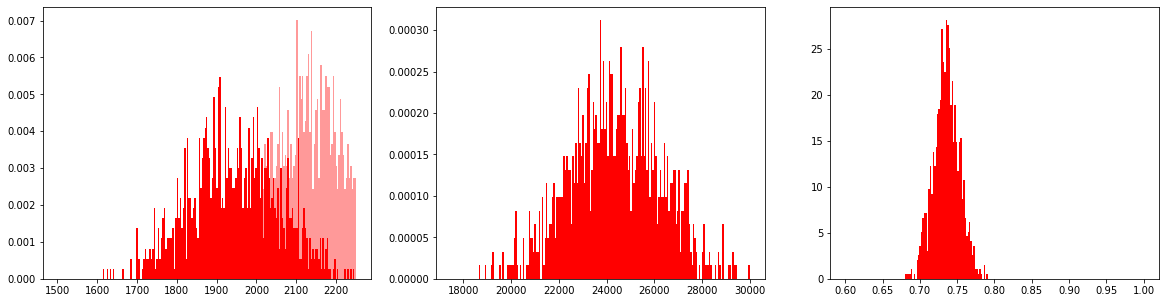

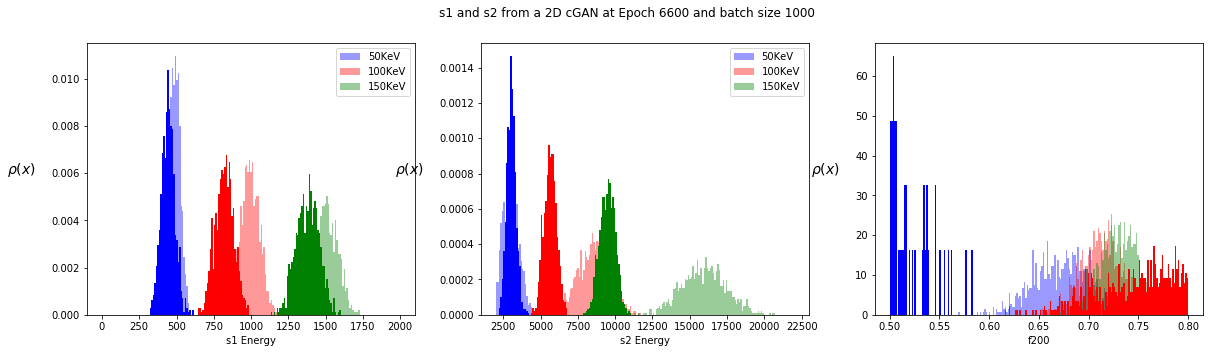

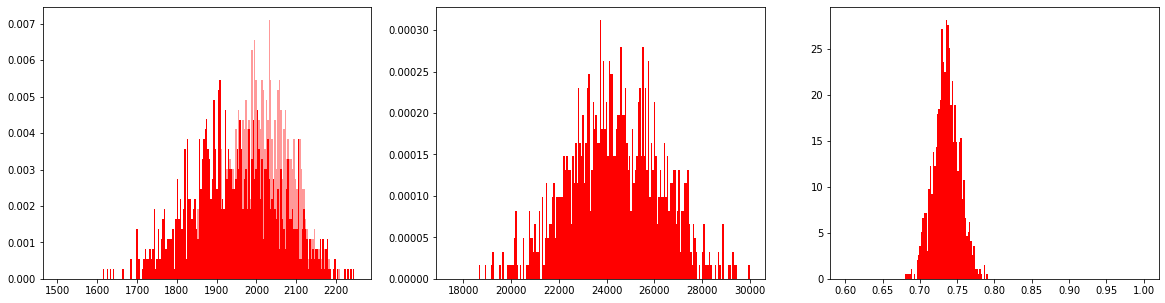

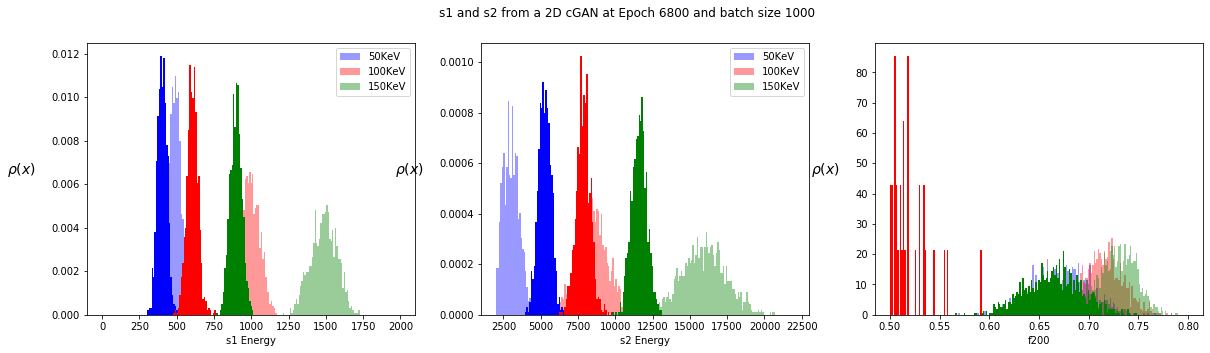

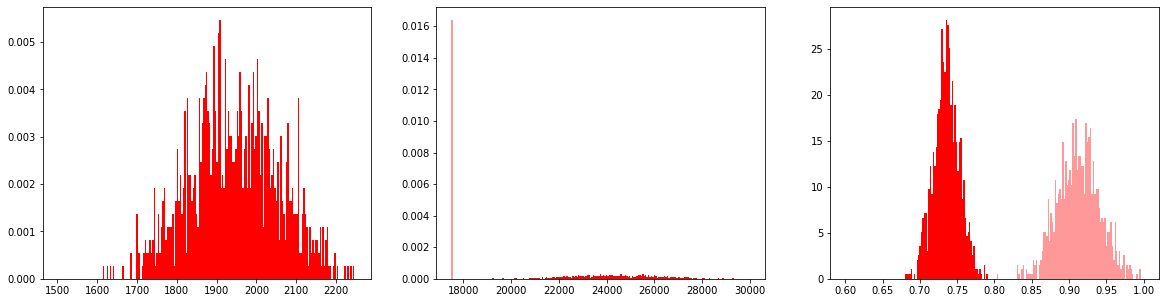

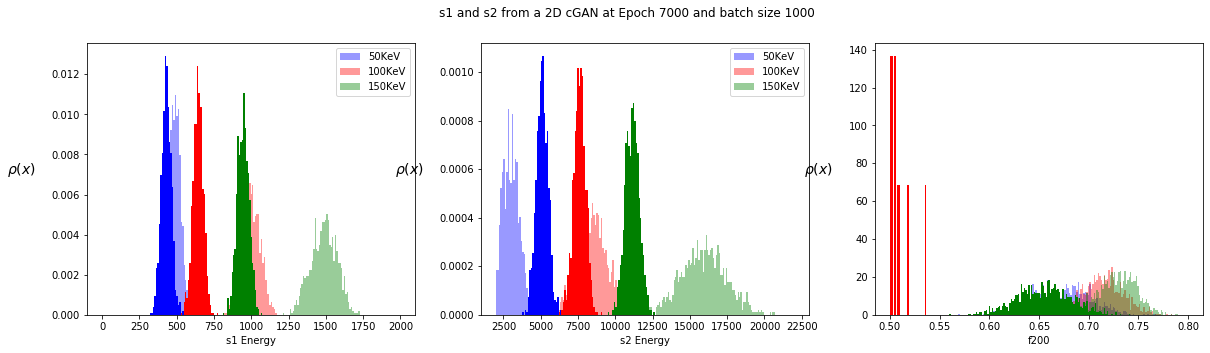

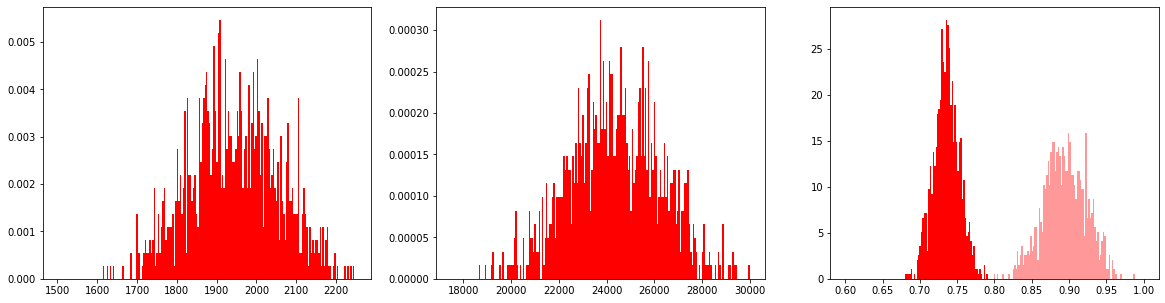

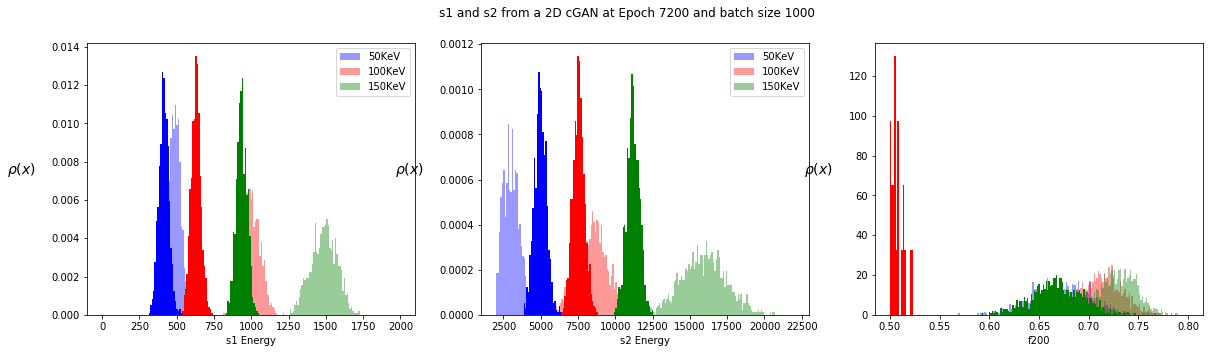

In [0]:
#  Train GAN
range_min, range_max = 0, 70
range_width = 70
plot_resolution = 200
epochs     = 30000
batch_size = 1000
minloss = 1000000
rel_batch_size = 1
real_loss = []
real_acc = []
epoch_no = []

def update_batch_size (gen_DS, e) :
    global batch_size
    #batch_size = min(max(batch_size, 100+int((e+1)/10.)), num_train)
    
def get_noise () :
    hyperparams = np.concatenate([np.full(fill_value=train_var[0], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[1], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[2], shape=(batch_size, 1))])
    noise = np.random.normal(size=(3*batch_size, noise_size))
    return noise, hyperparams

def get_train_data () :
    rannum1 = np.random.randint(0, len(train_DS_s1ene_50), rel_batch_size*batch_size)
    batch_s11 = train_DS_s1ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_s21 = train_DS_s2ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_f2001 = train_DS_f200ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_1 = np.matrix([batch_s11,batch_s21,batch_f2001]).T
    batch_1 = np.array(batch_1)

    batch_s12 = train_DS_s1ene_100[rannum1].reshape(rel_batch_size*batch_size)
    batch_s22 = train_DS_s2ene_100[rannum1].reshape(rel_batch_size*batch_size)
    batch_f2002 = train_DS_f200ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_2 = np.array(np.matrix([batch_s12,batch_s22,batch_f2002]).T)

    batch_s13 = train_DS_s1ene_150[rannum1].reshape(rel_batch_size*batch_size)
    batch_s23 = train_DS_s2ene_150[rannum1].reshape(rel_batch_size*batch_size)
    batch_f2003 = train_DS_f200ene_50[rannum1].reshape(rel_batch_size*batch_size)
    batch_3 = np.array(np.matrix([batch_s13,batch_s23,batch_f2003]).T)


    hyperparams = np.concatenate([np.full(fill_value=train_var[0], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[1], shape=(batch_size, 1)),
                                  np.full(fill_value=train_var[2], shape=(batch_size, 1))])
    return np.concatenate([batch_1, batch_2, batch_3]), hyperparams
  
epochs_saved = []
for e in range(epochs) :
    noise, noise_hyperparams    = get_noise()
    batch_DS, batch_hyperparams = get_train_data()
    gen_DS   = gc.predict([noise, noise_hyperparams])
    real_label  = np.array([[1., 0.] for i in range(3*batch_size)])
    fake_label  = np.array([[0., 1.] for i in range(3*batch_size)])
    train_label = np.array([[1., 0.] for i in range(3*batch_size)])
    X  = np.concatenate([batch_DS  , gen_DS    ])
    Xh = np.concatenate([batch_hyperparams  , noise_hyperparams    ])
    Y = np.concatenate([real_label, fake_label])
    W = np.concatenate([np.ones(shape=(batch_DS.shape[0],)), np.full(fill_value=rel_batch_size, shape=(gen_DS.shape[0],))])
    
    dc.trainable = True
    d_loss, d_acc = dc.train_on_batch([X, Xh], Y, sample_weight=W)

        
    noise, noise_hyperparams = get_noise()
    dc.trainable = False
    gan.train_on_batch([noise, noise_hyperparams], train_label)
    
    if e == 0 or (e+1) % 200 == 0 :
        noise, noise_hyperparams = get_noise()
        gen_DS = gc.predict([noise, noise_hyperparams])

        plot_points_GAN(
            gen_DS,
            train_DS_s1ene_50,
            train_DS_s1ene_100,
            train_DS_s1ene_150,
            epoch=e+1, 
            batch_size=batch_size, 
            d_acc=dc.evaluate([X, Xh], Y, sample_weight=W, verbose=0)[1])
        
        #Graph the two distributions and pick the best one
        hyperparams = np.full(fill_value=200, shape=(100000, 1))
        z = np.random.normal(size=(1000, noise_size))
        datapoints1 = gc.predict([z, hyperparams])[:,0]
        datapoints2 = gc.predict([z, hyperparams])[:,1]
        datapoints3 = gc.predict([z, hyperparams])[:,2]
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_figheight(5)
        fig.set_figwidth(20)

        trues1 = ax1.hist(train_DS_s1ene_200*div1,range = (1500,2250), density = True, bins = 205, alpha = 1, color='red', label = 'G4 Data')
        gens1 = ax1.hist(datapoints1*div1,range = (1500,2250), density = True, bins = 205, alpha = 0.4, color='red', label = 'Generated Data')
        trues2 = ax2.hist(train_DS_s2ene_200*div2,range = (17500,30000), density = True, bins = 205, alpha = 1, color='red', label = 'G4 Data')
        gens2 = ax2.hist(datapoints2*div2,range = (17500,30000), density = True, bins = 205, alpha = 0.4, color='red', label = 'Generated Data')
        truef200 = ax3.hist(train_DS_f200ene_200*div3,range = (0.6,1), density = True, bins = 205, alpha = 1, color='red', label = 'G4 Data')
        genf200 = ax3.hist(datapoints3*div3,range = (0.6,1), density = True, bins = 205, alpha = 0.4, color='red', label = 'Generated Data')
        #Check difference
        
        diffs1 = trues1[0] - gens1[0]
        diffs2 = trues2[0] - gens2[0]
        difff200 = truef200[0] - genf200[0]
        sum_diff = 0
        for i in range(len(diffs1)):
          sum_diff += abs(diffs1[i]) + abs(diffs2[i])  + abs(difff200[i])
        #If statement
        if sum_diff < minloss:
          #save weights
          print("SAVE")
          gc.save("3D_s1_s2_f200.h5")
          minloss = sum_diff        

        update_batch_size(gen_DS, e)
        epoch_no.append(e)
        real_loss.append(d_loss)
        real_acc.append(d_acc)
        epochs_saved.append(e+1)

In [0]:
#Print the predicted for a range
final_gc = load_model("3D_s1_s2_f200.h5", compile = False)
masses = [50.,100.,150.,200.,]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(20)

ax1.hist(train_DS_s1ene_50*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "50KeV - G4")
ax1.hist(train_DS_s1ene_100*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "100KeV - G4")
ax1.hist(train_DS_s1ene_150*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "150KeV - G4")
ax1.hist(train_DS_s1ene_200*div1,range = (rangemins1,rangemaxs1), density = True, bins = 205, alpha = 0.4, label = "200KeV - G4")

ax2.hist(train_DS_s2ene_50*div2,range = (rangemins2,rangemaxs2),density = True, bins = 205, alpha = 0.4, label = "50KeV - G4")
ax2.hist(train_DS_s2ene_100*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "100KeV - G4")
ax2.hist(train_DS_s2ene_150*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "150KeV - G4")
ax2.hist(train_DS_s2ene_200*div2,range = (rangemins2,rangemaxs2), density = True, bins = 205, alpha = 0.4, label = "200KeV - G4")

ax3.hist(train_DS_f200ene_50*div3,range = (rangeminf200,rangemaxf200),density = True, bins = 205, alpha = 0.8, label = "50KeV")
ax3.hist(train_DS_f200ene_100*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, alpha = 0.8, label = "100KeV")
ax3.hist(train_DS_f200ene_150*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, alpha = 0.8, label = "150KeV")
ax3.hist(train_DS_f200ene_200*div3,range = (rangeminf200,rangemaxf200), density = True, bins = 205, alpha = 0.8, label = "150KeV")

ax2.set_xlabel("s2 Energy")
ax1.set_xlabel("s1 Energy")
ax3.set_xlabel("f200")

for i in range(len(masses)):
  hyperparams = np.full(fill_value=masses[i], shape=(100000, 1))
  z = np.random.normal(size=(10000, noise_size))
  datapoints1 = final_gc.predict([z, hyperparams])[:,0]
  datapoints2 = final_gc.predict([z, hyperparams])[:,1]
  datapointf200 = final_gc.predict([z, hyperparams])[:,2]
  ax1.hist(datapoints1*div1, density = True, bins = 205, label = f'{masses[i]}KeV - GAN')
  ax2.hist(datapoints2*div2, density = True, bins = 205, label = f'{masses[i]}KeV - GAN')
  ax3.hist(datapointf200*div3, density = True, bins = 205, label = f'{masses[i]}KeV - GAN')

ax1.legend(loc="upper right", fontsize=10)
ax2.legend(loc="upper right", fontsize=10)
ax3.legend(loc="upper right", fontsize=10)
plt.show()
  

In [0]:
del epoch_no[0]
del real_loss[0]
del real_acc[0]
h3 = plt.plot(epoch_no,real_loss, color = 'blue', label = "Loss")
h4 = plt.plot(epoch_no,real_acc, color = 'orange', label = "Accuracy")
plt.xlabel("Epoch number", size=14, labelpad=10)
plt.ylabel("Loss", size=14, labelpad=30, rotation="vertical")
plt.title(f"Disciminator variables with batch size {batch_size} for s1 vs s2")
plt.legend(loc="upper right", fontsize=10)
plt.show()